<a href="https://colab.research.google.com/github/Ljut/PSAI-DSAI-datasets/blob/in-progress/VIS25_TIM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadaća 1 – Primijenjena vjerovatnoća i statistika

Tim 1:
**Adnan Muradbegović, Aid Mustafić, Tarik Redžić, Zlatan Ljutika**


---









### Figure 1. Ilustrativni prikaz posvećenosti Tima 1 zadatku






<center><img src="https://i.imgur.com/Fur5grf.jpeg" alt="drawing" width="50%"/></center>



## 1. Uvod u rad; Opis problema i podataka

---



U ovom projektu, analiziramo podatke iz dataseta
[***Freelancer Earnings and Job Trends.***](https://www.kaggle.com/datasets/shohinurpervezshohan/freelancer-earnings-and-job-trends/), koji sadrži *podatke o poslovanju nasumično izabranih freelancera na 5 najpopularnijih platformi.*

**Period prikupljanja podataka:** *14. januar - 29. decembar 2024.*

Konkretno, motiv i cilj ove analize je **izvršiti istraživanje stanja i potreba freelance tržišta u prethodnoj godini,** na osnovu kojeg nastojimo ustanoviti i **iznijeti korisne zaključke za studente koji vrše prve korake u freelancing-u.**


---



Prije početka rada, **nužno je pokrenuti naredni blok koda** , koji učitava potrebne biblioteke i inicijalizira dataset za rad.


In [ ]:
!rm -rf PSAI-DSAI-datasets
!git clone -b in-progress https://github.com/Ljut/PSAI-DSAI-datasets

import pandas as pd ## Za manipulisanje golih podataka, (CSV, DataFrame,...)
import matplotlib.pyplot as plt ## Za vizualizaciju podataka
import numpy as np ## Za izvršavanje matematičkih operacija nad podacima
from IPython.display import HTML
import seaborn as sns

df = pd.read_csv('./PSAI-DSAI-datasets/freelancer_earnings_bd.csv')

Cloning into 'PSAI-DSAI-datasets'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 187 (delta 12), reused 15 (delta 7), pack-reused 164 (from 1)
Receiving objects: 100% (187/187), 14.39 MiB | 7.46 MiB/s, done.
Resolving deltas: 100% (100/100), done.


## **Opis analiziranog dataseta:**

Osnovne informacija o datasetu i podacima koje sadrži.

---

Dataset sadržava podatke o zaradi i poslovanju freelancera sa portala *Toptal, Fiverr, PeoplePerHour, Upwork* i *Freelancer.*

* **Broj obrađenih slučajeva** (redova): 1950
* **Broj posmatranih parametara** (kolona): 14 *( + jedinstveni ID freelancera )*



 * **Kategorični podaci:**

  1.   *Job_Category:* **Tip usluge, svrstano u 8 posmatranih kategorija.**
  2.    *Platform:* **Portal na kojem se izvršila usluga. 5 posmatranih kategorija**
  3.  *Experience_Level:* (Subjektivna, objektivna...?) **Procjena iskustva freelancera, svrstano u *Expert, Intermediate* i *Beginner***
  4.  *Region:* **Lokacija freelancera. Svrstano u 7 regija**
  5.   *Payment_Method:* **Način isplate**
  6.  *Project_Type:* **Način poslovanja, po fiksnoj stopi ili satnici.**



  


In [ ]:
#@title ####**Tabela 1:** *Kategorički podaci dataseta* { display-mode: "form" }
desc_categorical = df[['Job_Category','Platform','Experience_Level','Region','Payment_Method','Project_Type']].describe().T

desc_categorical['most_common'] = desc_categorical['top'] + ': '+desc_categorical['freq'].astype(str)+'/'+desc_categorical['count'].astype(str)

desc_categorical.drop('count',axis=1,inplace=True); ## Drop podrazumijevano pravi kopiju, inplace djeljuje na pozvani objekt
desc_categorical.drop('top',axis=1,inplace=True);
desc_categorical.drop('freq',axis=1,inplace=True);

desc_categorical['categories'] = df.apply(lambda x: ', '.join(map(str,x.unique()))) ## Output u index "categories": Kategorija1, Kategorija2,..

html = f"""
<div style="margin-top: 20px;display:flex;flex-direction:column;justify-content:center">
  {desc_categorical.to_html(index=False)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 1: Kategorični podaci dataseta
  </p>
</div>
"""
display(HTML(html))

unique,most_common,categories
8,Graphic Design: 265/1950,"Web Development, App Development, Data Entry, Digital Marketing, Customer Support, Content Writing, Graphic Design, SEO"
5,Upwork: 420/1950,"Fiverr, PeoplePerHour, Upwork, Toptal, Freelancer"
3,Beginner: 668/1950,"Beginner, Intermediate, Expert"
7,Australia: 298/1950,"Asia, Australia, UK, Europe, USA, Middle East, Canada"
4,Crypto: 514/1950,"Mobile Banking, Crypto, Bank Transfer, PayPal"
2,Fixed: 997/1950,"Fixed, Hourly"




---


### **Kvantitativni podaci:**
7.    *Earnings_USD*: **Ukupna zarada u USD** *(Američki dolari)*
8.   *Hourly_Rate:* **Satnica freelancera u USD**  *(Američki dolari)*
9. *Job_Success_Rate:* **Postotak uspješno izvršenih usluga. Kriterij posmatranja:** [50%,100%]
10. *Job_Duration_Days:* **Prosječna dužina projekta, u danima**
11.  *Job_Completed:* **Broj uspješno izvršenih usluga**
12. *Client_Rating:* **Prosječna ocjena freelancera od klijenata,** [1.0-5.0]
13.   *Rehire_Rate:* **Postotak klijenata koji odluče ponovno koristiti usluge freelancera**
14. *Marketing_Spend:* **Ukupno uloženo u reklamiranje usluga**




   


In [ ]:
#@title ####**Tabela 2:** *Kvantitativni podaci dataseta* { display-mode: "form" }
desc_quantitative = df[['Earnings_USD','Hourly_Rate','Job_Success_Rate','Client_Rating','Rehire_Rate','Marketing_Spend']].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).T


desc_quantitative.drop('count',axis=1,inplace=True); ## Drop podrazumijevano pravi kopiju, inplace djeljuje na pozvani objekt
desc_quantitative.drop('std',axis=1,inplace=True)
desc_quantitative.rename(columns={'10%':'10thPercentile','25%':'1stQuartile','75%':'3rdQuartile','90%':'90thPercentile','50%': 'median'},inplace=True)
pd.set_option('display.max_colwidth',None) ## Globalno pravilo, nije prikazivalo sve kategorije u tabelu


html = f"""
<hr>
<div style="margin-top: 20px;display:flex;flex-direction:row;justify-content:center">

  {round(desc_quantitative,2).to_html(index=True)}

  <div style="margin:5%">
  <h3>Napomena:</h3>
<p>Ovdje zapažamo da srednja vrijednost i medijana podataka su vrlo slične. <br>Ovo je naznaka da su podaci <em>ravnomjerno/simetrično raspoređeni</em> oko njihove srednje vrijednosti.</p>
</div>
</div>
<h4 style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 2: Kvantitativni podaci dataseta
  </h4>
"""
display(HTML(html))


,mean,min,10thPercentile,1stQuartile,median,3rdQuartile,90thPercentile,max
Earnings_USD,5017.57,51.00,965.00,2419.00,5048.00,7608.25,9057.60,9991.00
Hourly_Rate,52.58,5.02,15.87,30.05,52.28,75.12,90.56,99.83
Job_Success_Rate,74.95,50.16,54.66,61.92,75.40,87.54,94.90,99.99
Client_Rating,4.00,3.00,3.19,3.51,3.99,4.50,4.78,5.00
Rehire_Rate,44.56,10.00,16.86,27.15,43.92,61.69,73.04,79.95
Marketing_Spend,248.52,0.00,40.00,119.00,252.50,379.00,452.00,499.00


In [ ]:
#@title ####**Tabela 3:** *Primjerak; Prvi deset zapisa podataka u datasetu* { display-mode: "form" }
html = f"""
<hr>
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column">

  {df.head(10).to_html(index=False)}
  <h3 style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 3: Prvih deset zapisa podataka u datasetu
  </h3>

</div>
<hr>
"""

display(HTML(html))

Freelancer_ID,Job_Category,Platform,Experience_Level,Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489
6,Customer Support,Toptal,Beginner,Europe,Crypto,280,6867,43.04,57.80,4.87,8,Fixed,43.88,290
7,Web Development,Fiverr,Beginner,USA,Crypto,96,1677,20.50,52.90,4.29,32,Hourly,45.99,343
8,Data Entry,Toptal,Beginner,Australia,Bank Transfer,112,6193,82.15,93.31,3.84,30,Fixed,31.59,168
9,Content Writing,Toptal,Intermediate,USA,Crypto,233,8446,26.44,80.06,4.27,46,Fixed,50.11,396
10,Data Entry,PeoplePerHour,Beginner,Middle East,Mobile Banking,156,6608,54.99,85.40,4.57,52,Hourly,32.76,160



### **Deskriptivna analiza; Osnovni podaci**

Neke osnovne vizualizacije. Služe za bolje razumijevanje podataka u datasetu.

---

#### **Figura 2:** *Bar-plot vizualizacija distribucije freelancera po tipu usluge*

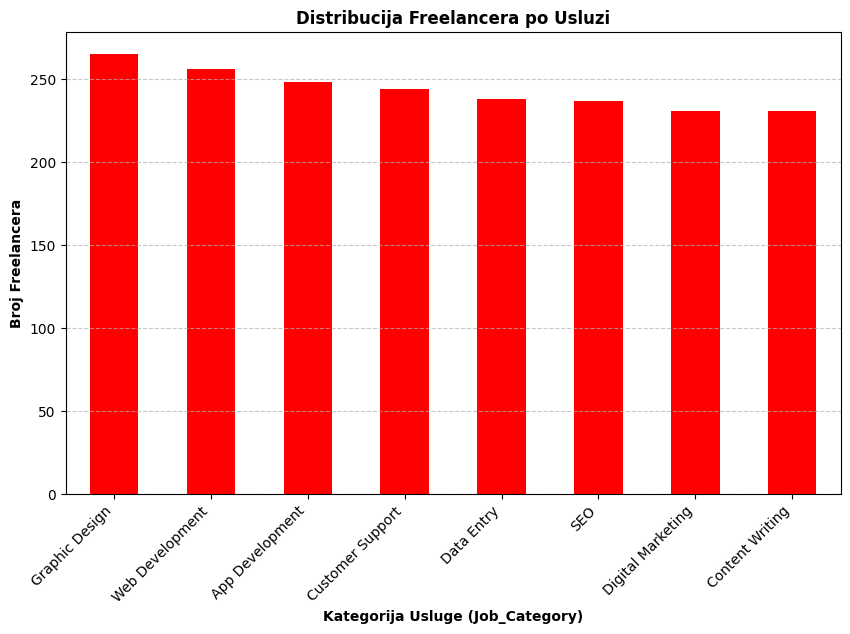

In [ ]:
plt.figure(figsize=(10,6))
df['Job_Category'].value_counts().plot(kind='bar',color='red')
plt.title('Distribucija Freelancera po Usluzi',fontweight='bold')
plt.xlabel("Kategorija Usluge (Job_Category)",fontweight='bold')
plt.ylabel("Broj Freelancera",fontweight="bold")
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)


**Zaključak posmatranja:** Čak i ako pretpostavimo da podaci dataseta nisu stratificirano izabrani po posmatranom parametru i naizgled, na Figuri 2 **postoji razlika** između zastupljenosti različitih usluga na tržištu *(Grafički dizajn, Web Development kao najzastupljeniji, a Digital Marketing i Content Writing kao najmanje zastupljene usluge)*, **nedovoljno je za generalan i konkretan zaključak, 10% +/- 1%**.

Potrebno je daljnje ispitivanje.

#### **Figura 3:** *Pie-chart vizualizacija poslovanja po regijama*
<hr>

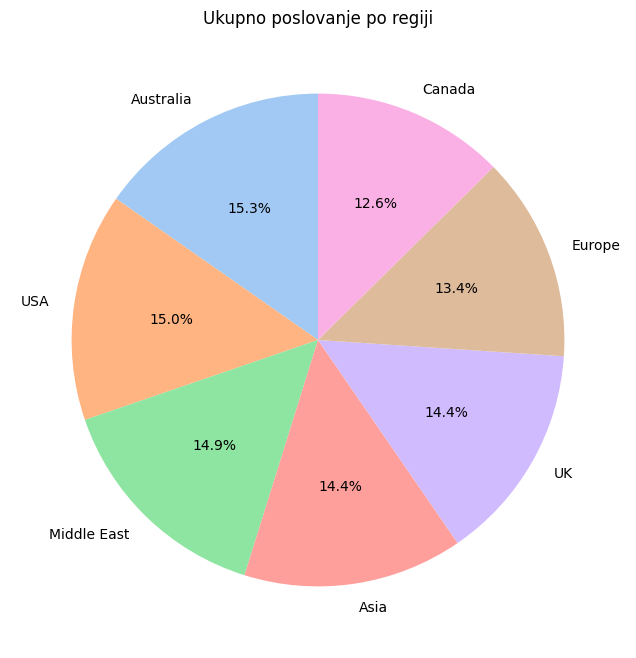

In [ ]:
plt.figure(figsize=(8,8))
df['Region'].value_counts().plot(
    kind='pie',autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel')
)
plt.ylabel('')
plt.title('Ukupno poslovanje po regiji')
plt.show()


*Napomena: Obzirom da su podaci modulski generisani (izvor: dokumentacija dataseta), minimalne procentualne razlike možemo posmatrati kao kontrolisani šum.* <br>
**Zaključak posmatranja:** Sa Figure 3, dobijamo već veći dojam da se radi o **stratificirano izabranim podacima**, te da vjerovatno nećemo nikakve konkretne zaključke moći iznijeti pri globalnoj analizi hipoteza.



Pri analizama, potrebno će biti razmotriti da li postoji konkretniji zaključci pri sužavanju populacije.
<hr>
<br>

Za deskriptivni segment ove analize, posmatramo **novčani prihod freelancera,** Earnings_USD.<br>




### **Figure 4, 5, 6 i 7:** *Box-plot vizulizacija raspodjele zarade freelancera*
<hr>

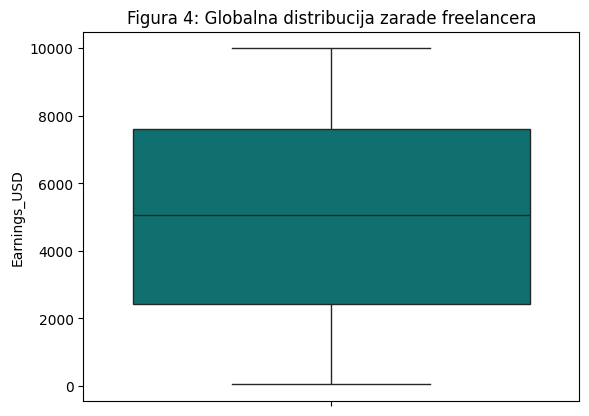

In [ ]:

html = f"""
<p style="font-size:1.25em">
<i>Ako posmatramo novčani prihod kao osnovni pokazatelj uspjeha freelancera i općeg stanja tržišta</i>, možemo dobiti jasniju i detaljniju sliku o poslovanju freelancera, usluga i platformi na tržištu te o potrebnim narednim koracima u anailzi.</p>
"""
display(HTML(html))
sns.boxplot(data=df, y='Earnings_USD',color="teal")
plt.title("Figura 4: Globalna distribucija zarade freelancera")
plt.show()

Očekivano, zaista **ništa konkretno ne dobijamo iz globalnog posmatranja ove raspodjele,** stoga smo prinuđeni posmatrati suženije populacije.

<hr>

C:\Program Files\KMSpico\temp\ipykernel_9052\2424565477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boxplot, y='Zarada ($USD)',x='Tip Usluge',palette="Set1")


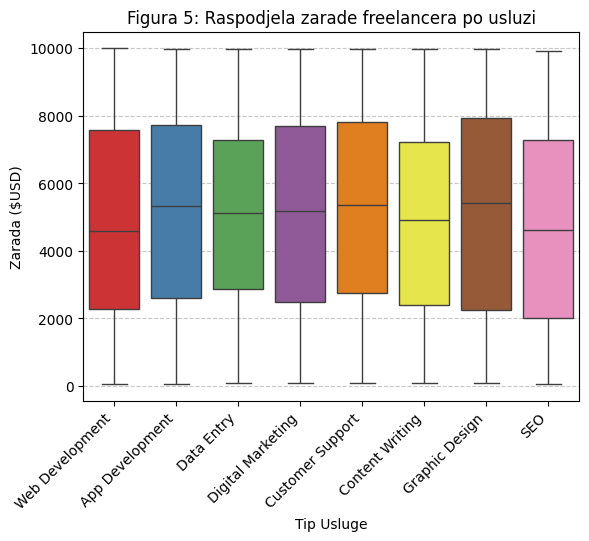

In [ ]:
boxplot = df.rename(columns={'Region':'Regija', "Earnings_USD":"Zarada ($USD)","Job_Category":"Tip Usluge"})
sns.boxplot(data=boxplot, y='Zarada ($USD)',x='Tip Usluge',palette="Set1")
plt.title("Figura 5: Raspodjela zarade freelancera po usluzi")
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


**Zaključak posmatranja:**

Figura 5, po sličnosti maksimalne zarade među uslugama, sugeriše da **sposoban freelancer može ostvariti značajan prihod, bez obzira na tip usluge.**

Međutim, ogromne varijacije zarade, *opisane širokim IQR-ovima,* ukazuju na **potrebu dodatnog ispitivanja ostalih parametara u datasetu i njihov utjecaj na uspjeh i prihod freelancera.**

<hr>

C:\Program Files\KMSpico\temp\ipykernel_9052\3416657401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boxplot, y='Zarada ($USD)',x='Regija',palette="Set2")


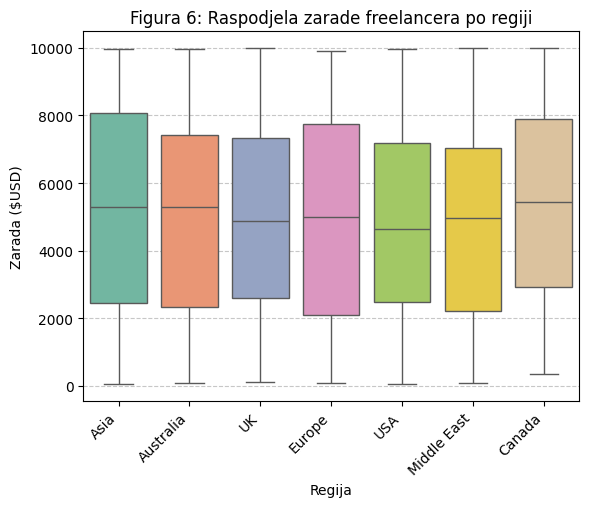

In [ ]:
sns.boxplot(data=boxplot, y='Zarada ($USD)',x='Regija',palette="Set2")
plt.title("Figura 6: Raspodjela zarade freelancera po regiji")
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


**Zaključak posmatranja:**

Shodno Figuri 5, sličnosti maksimalne zarade po regijama, sugeriše da **sposoban freelancer može ostvariti značajan prihod, neovisno ni od regije u kojoj posluje.**
No, ovdje primjećujemo malo značajnije promjene u minimalnoj zaradi po regiji, te izraženije razlike IQR i medijana zarade.
Ogromne varijacije i daje posustaju, te ponovo potvrđuje se potreba za dodatnim ispitivanjem, no Figura 6 sugeriše da distribucija zarade u Aziji i Kanadi su pozitivinije za freelancere. *(Viši medijan zarade, najviši 75. percentili)*

<hr>

C:\Program Files\KMSpico\temp\ipykernel_9052\1027669437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g= sns.catplot(data=boxplot, x="Tip Usluge", y="Zarada ($USD)", col="Regija", kind="box",col_wrap=1,height=4,aspect=1.5,sharex=False,palette=palette_dict)


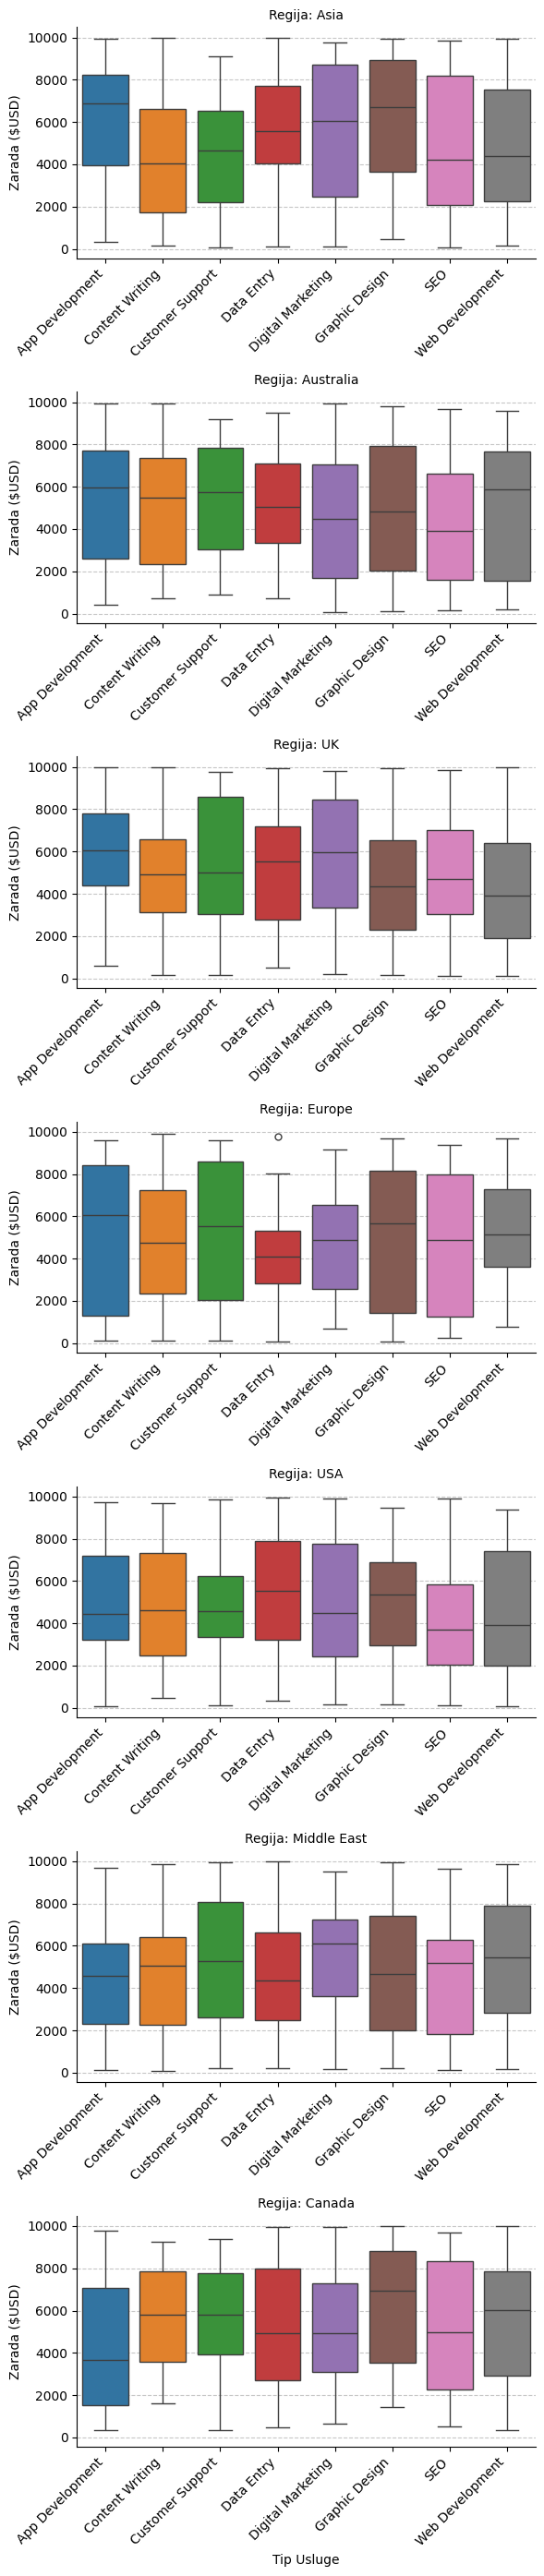

In [ ]:
order = sorted(boxplot["Tip Usluge"].unique())
boxplot["Tip Usluge"] = pd.Categorical(boxplot["Tip Usluge"], categories=order, ordered=True)
palette = sns.color_palette("tab10", n_colors=len(order))
palette_dict = dict(zip(order, palette))

g= sns.catplot(data=boxplot, x="Tip Usluge", y="Zarada ($USD)", col="Regija", kind="box",col_wrap=1,height=4,aspect=1.5,sharex=False,palette=palette_dict)
g.set_xticklabels(rotation=45,ha="right")
g.set_titles("Regija: {col_name}")

for ax in g.axes.flat:
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

****Zaključak posmatranja:****

Na Figuri 7 prikazano je trenutno stanje tržišta u različitim regijama. Distribucije zarade sugeriraju da freelanceri, iako nude iste usluge, posluju drastično različito od regije do regije.

Ovdje se može primjetiti i predložiti sljedeće:

<ul> <li> Pored globalno najunosnijih usluga, postoje <b>specifična regionalna tržišta</b> gdje određene usluge natprosječno posluju.

Najkonzistentnije pozitivne distribucije zarade primjećuju se kod **kreativnih i tehničkih usluga**, poput <b>Graphic Design</b> i <b>App Development</b>. Ovo se ogleda kroz relativno visoke medijane, treće kvartile te maksimalne i minimalne prihode.<br> Ipak, postoje izuzeci: **usluge koje se često smatraju manje isplativima**, poput <b>Customer Support</b> ili <b>Data Entry</b>, mogu imati **izuzetno povoljne distribucije zarade u određenim regijama**.

Freelanceri iz <b>Ujedinjenog Kraljevstva</b> i <b>SAD-a</b> to konkretno i potvrđuju. </li> </ul>
Budući da su najunosnije usluge istovremeno i najzasićenije konkurencijom, preporučuje se:
Prije ulaska u freelancing, istražite stanje na vašem regionalnom tržištu.
**Specijalizacija u manjem, regionalno traženom sektoru može biti ključ za uspješniji i stabilniji razvoj karijere.**

I dalje prisutne varijacije u distribucijama, različite minimalne/maksimalne vrijednosti ukazuju na potrebu za daljnjom analizom dodatnih parametara, kako bi se donijeli još precizniji zaključci.
<hr>

#### **Angedota:** *Ograničenost dataseta; Po kojem kriteriju je definisano iskustvo freelancera? (Experience_Level)*

Za deskriptivnu analizu, primjećuje se manjak upotrebe "scatter-plota" kao alata za vizualizaciju podataka.<br>

Naime, po strukturi dataseta, svaki freelancer je kategorisani u **Beginner-a, Intermediate-a i Expert-a.** Međutim, u dokumentaciji, ne ulazi se u detalje po kojem kriteriju je to zapravo uvedeno, naročito kad se uzme u obzir da se radi o poslovanju na različitim platformama.

U prvoj iteraciji ove analize, pomoću naizgled srodnih kolona: Rehire_Rate, Client_Rating, Job_Completed i Earnings_USD smo koristeći scatter-plot pokušali suziti definiciju, što je proizvelo sljedeće:

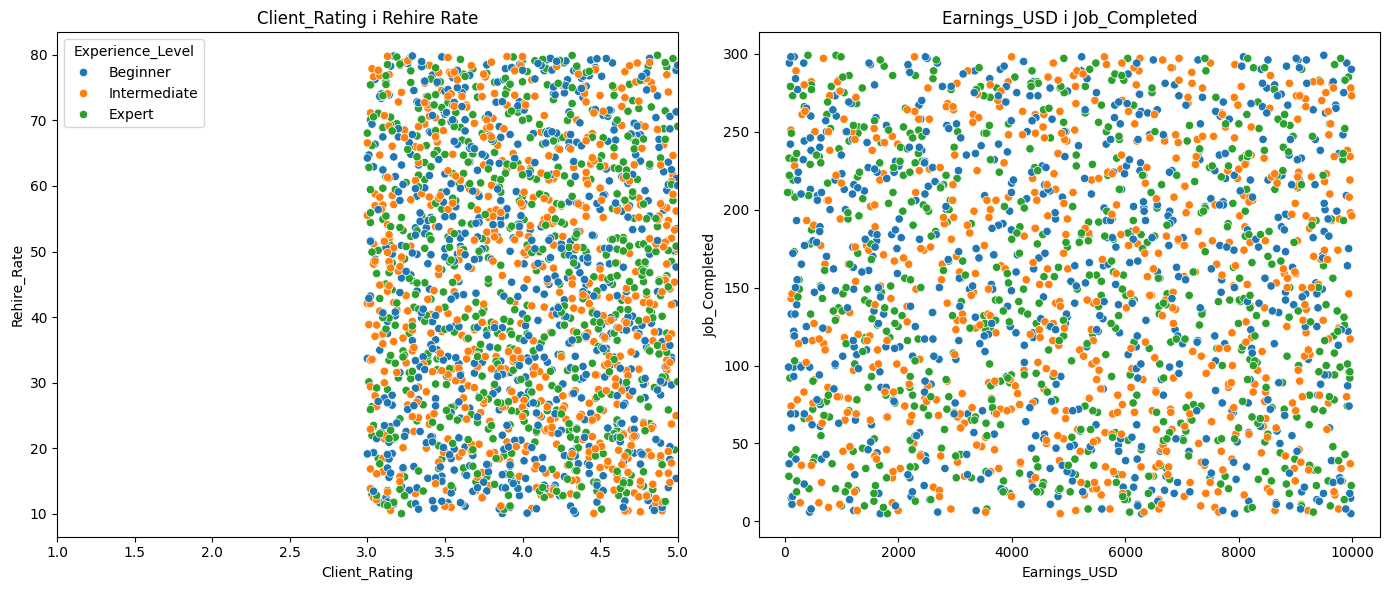

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=df, y='Rehire_Rate', x='Client_Rating', hue='Experience_Level', ax=axes[0])
axes[0].set_title('Client_Rating i Rehire Rate')
axes[0].set_xlim(1, 5)
sns.scatterplot(data=df, y='Job_Completed', x='Earnings_USD', hue='Experience_Level', ax=axes[1],legend=False)
axes[1].set_title('Earnings_USD i Job_Completed')

plt.tight_layout()
plt.show()

**Vrlo kratkim posmatranjem ovih plotova**, suočavamo se sa **nevjerovatnom anarhijom tačaka podataka**, gdje **gotovo svaka kombinacija (čak i logički kontradiktorna) je jednako moguća**.  
**Primjer**: *Početnici koji završavaju >=300 poslova ili < 50, a zarađuju ~10,000 USD*, i *eksperti koji imaju 10% procentualnih stalnih klijenata i najniže recenzije*.  
**Pri tom, ne postoji ocjena niža od 3.0.**

Obzirom da su podaci **modulski-generisani**, iz ovoga zaključujemo da je **ovaj parametar posve nasumičan**, te **u cilju kvalitetne izrade zadaće, zadržavamo pravo subjektivnog definisanja ovog parametra**.
<hr>

## 3. Vjerovatnoća (Poglavlje 2),
        
Definišite i izračunajte osnovne i uslovne vjerovatnoće koristeći podatke iz dataseta.
---
### Hipoteza: Iskusniji _freelancer_-i gravitiraju ka platformi Toptal dok oni manje iskusni preferiraju Fiverr

Svako ko se zanima za rad na daljinu u IT industriji, zna da platforma Toptal važi za \"elitnu\" platformu koja prihvata samo najbolje kandidate kroz rigorozni proces intervjua koji uključuje rješavanje teških algoritamskih problema i ponaša se više kao svojevrstan _head hunter_ za velike firme nego tradicionalna stranica za oglase. S druge strane, platforma Fiverr je poznata po jednostavnosti upotrebe, satnicama od čak $5 (odakle dolazi i ime Fiverr) i zasićenosti tržišta.
        
Bilo bi prirodno zaključiti da su iskusniji _freelancer_-i prisutniji na ekskluzivnim platformama poput Toptal-a, a da oni koji tek ulaze u svijet _freelancing_-a preferiraju pristupačnije platforme.

No, da li se naša hipoteza zasnovana na anegdotalnim dokazima poklapa sa činjenicama o dostupnom uzorku? To možemo zaključiti samo primjenom matematičke teorije vjerovatnoće.

Prvo ćemo za svaku platformu izračunati vjerovatnoću da je freelancer koristi pod uslovom da znamo njegov nivo iskustva. Dobivene vrijednosti ćemo prikazati tablično. Za sam proračun, koristit ćemo matematičku formulu za uslovnu vjerovatnoću:

$
P(\text{Platform}|\text{Experience\textunderscore Level}) = \frac{P(\text{Platform} \cap \text{Experience\textunderscore Level})}{P(\text{Experience\textunderscore Level})}
$

In [ ]:
# Vaš kod ovdje

# Ova funkcija ispisuje uvjetnu vjerovatnoću da freelancer koristi neku platformu ako mu znamo nivo iskustva
# Funkciju je napisao GitHub Copilot na osnovu koda kojeg sam ranije pisao za pojedinačne slučajeve i opisa funkckije koji sam dao u komentaru

def conditional_probability(df, platform, experience_level):
    return len(df.query(f"Platform == '{platform}' & Experience_Level == '{experience_level}'")) / len(df.query(f"Experience_Level == '{experience_level}'"))


matrica = np.zeros((3, 5),dtype=object)
i = 0
for experience_level in {"Beginner", "Intermediate", "Expert"}:
    #print(f"Ispis za platformu '{platform}'")
    j = 0
    for platform in {"Fiverr", "Freelancer", "PeoplePerHour", "Toptal", "Upwork"}:
        probability = conditional_probability(df, platform, experience_level)
        matrica[i][j] = probability #f"{round(probability * 100, 2)} %"
        j+=1
    i+=1
        #print(f"Uvjetna vjerovatnoća da freelancer ima nivo iskustva '{experience_level}' ako je korisnik platforme '{platform}': {conditional_probability(df, platform, experience_level)}")
    #print("")
html = f"""
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column;width:100%;fontweight:bold">

  {pd.DataFrame(matrica, columns=["Fiverr", "Freelancer", "PeoplePerHour", "TopTal", "Upwork"],index=["Beginner", "Intermediate", "Expert"]  )
.to_html(index=True)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela 4: Uvjetna vjerovatnoća iskustva freelancera na platformi
  </p>

</div>
"""

display(HTML(html))

,Fiverr,Freelancer,PeoplePerHour,TopTal,Upwork
Beginner,0.201248,0.229329,0.195008,0.191888,0.182527
Intermediate,0.203593,0.193114,0.194611,0.215569,0.193114
Expert,0.188768,0.224649,0.212168,0.199688,0.174727


Zbog malih razlika u izračunatim vjerovatnoćama, ne možemo reći da nam tablica mnogo govori o našoj hipotezi. Čak bi se moglo reči da se sa njom donekle i kosi. Naime, vjerovatnoća da početnik koristi TopTal (0.212168) je čak veća od vjerovatnoće da ga koristi ekspert (0.194611) ili srednje iskusan freelancer (0.195008). Također se da primijetiti da je vjerovatnoća da ekspert koristi Fiverr (0.215569) veća u odnosu na vjerovatnoće da ga koristi početnik (0.191688) i srednje iskusan freelancer (0.191888). Ove informacije možemo ljepše prikazati pomoću _heat map_ i _bar plot_ vizualizacija.

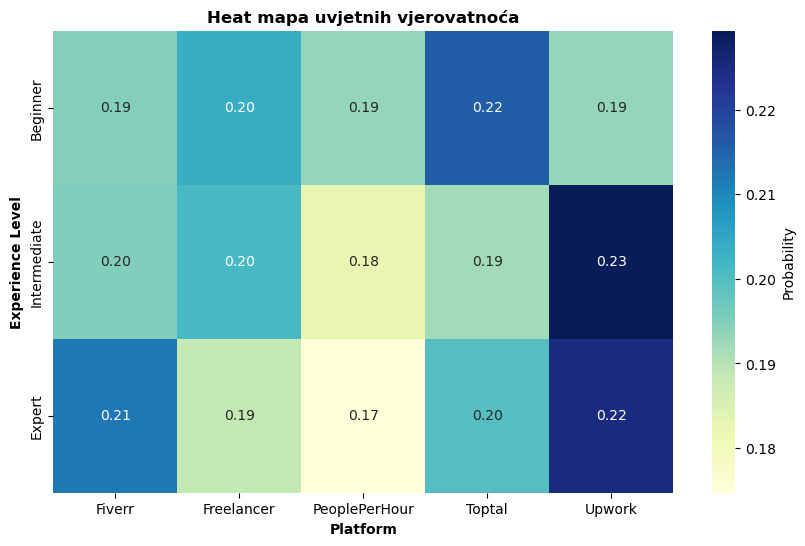

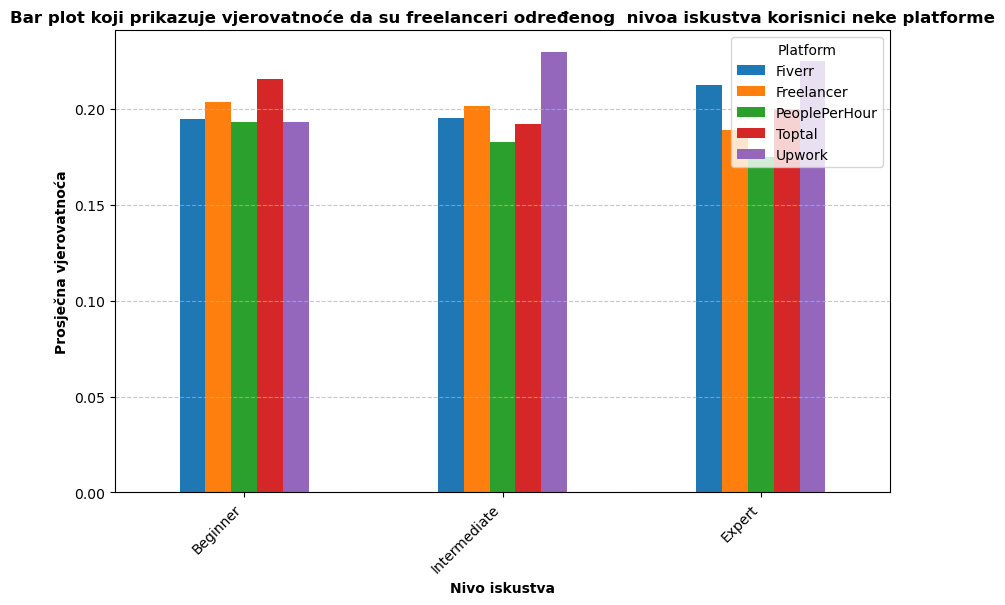

In [ ]:
global_data = df.groupby("Experience_Level")["Platform"].value_counts(normalize=True).unstack()
global_data = global_data.reindex(["Beginner", "Intermediate", "Expert"])  # Reorder rows


plt.figure(figsize=(10, 6))
sns.heatmap(global_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.title("Heat mapa uvjetnih vjerovatnoća", fontweight='bold')
plt.xlabel("Platform", fontweight='bold')
plt.ylabel("Experience Level", fontweight='bold')
plt.show()


# Create a bar chart for the whole world
global_data.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('tab10'))
plt.title("Bar plot koji prikazuje vjerovatnoće da su freelanceri određenog  nivoa iskustva korisnici neke platforme", fontweight='bold')
plt.xlabel("Nivo iskustva", fontweight='bold')
plt.ylabel("Prosječna vjerovatnoća", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

Tačnost naše hipoteze je, dakle, u najboljem slučaju nejasna, a u najgorem slučaju potpuno opovrgnuta. Možemo se zapitati da li su razne priče o platformama za rad na daljinu uopšte blizu stvarnosti kao i da li je ovaj uzorak zaista reprezentativan (na svijetu postoji mnogo više freelancera od 1950 u ovom uzorku). Razno filozofiranje o dobivenom setu podataka ćemo ipak ostaviti za kraj. Nešto što se već sada da primijetiti je da

Kako se radi o globalnim podacima, moguće ih je razvrstati po regijama. Zbog toga se možemo pitati, da li naša hipoteza ima veću "težinu" (i u smislu da je tačna i u smislu da je netačna) ako se gledaju specifične regije. Možda su neke platforme popularnije u nekim regijama pa se to odražava i na njihovu popularnost među freelancerima različitih nivoa iskustva u određenoj regiji. Možda je nedavna eksplozija neke platforme u zemljama trećeg svijeta dovela do priliva freelancera svih nivoa iskustva na istu. Možda su korisnici TopTala koncentrisani u razvijenijim regijama. Sada ćemo ponoviti sve izračune koje smo izvršili za globalne podatke, ali po regijama.

Za tu svrhu ćemo opet koristiti uvjetnu vjerovatnoću, samo ćemo ovoga puta kao uvjet postaviti da se radi o nekom freelanceru koji je određenog nivoa vještine _i_ iz određene regije. Pri pisanju nove formule, ovo "i" nas može asocirati na operaciju presjeka skupova. Dakle, formula će sadržavati uvjet $\text{Experience\textunderscore Level}\cap\text{Region}$ i u cjelosti izgledati ovako:

$
P(\text{Platform}|\text{Experience\textunderscore Level}\cap\text{Region}) = \frac{P(\text{Platform} \cap \text{Experience\textunderscore Level} \cap \text{Region})}{P(\text{Experience\textunderscore Level}\cap\text{Region})}
$

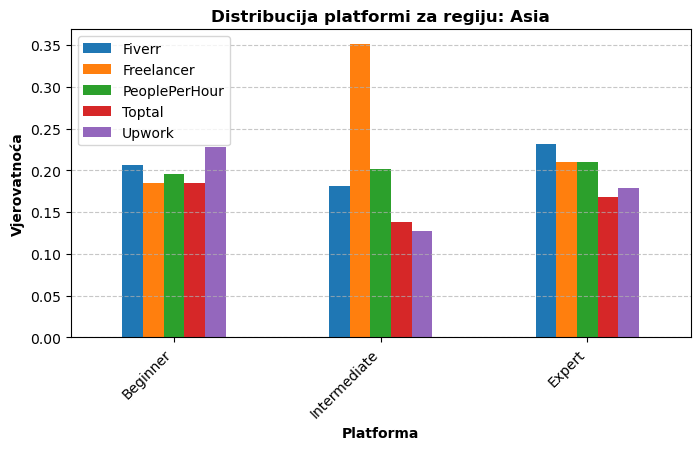

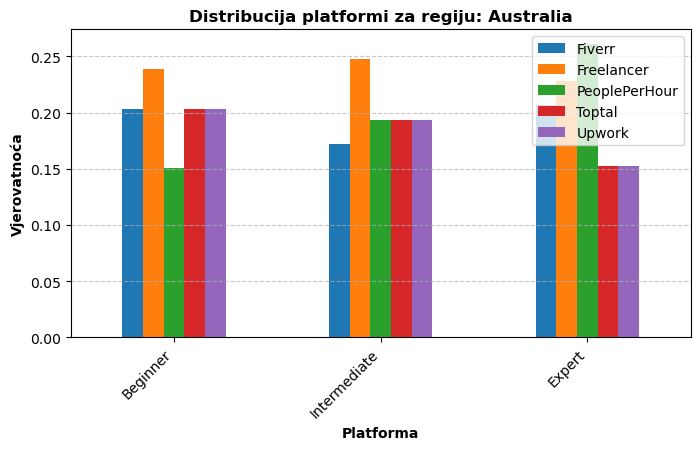

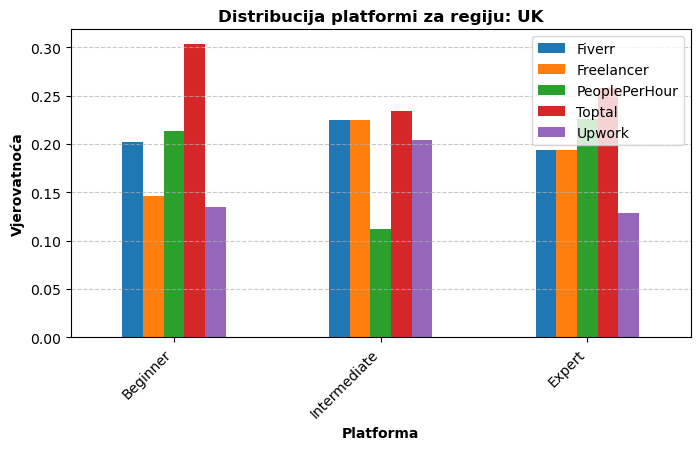

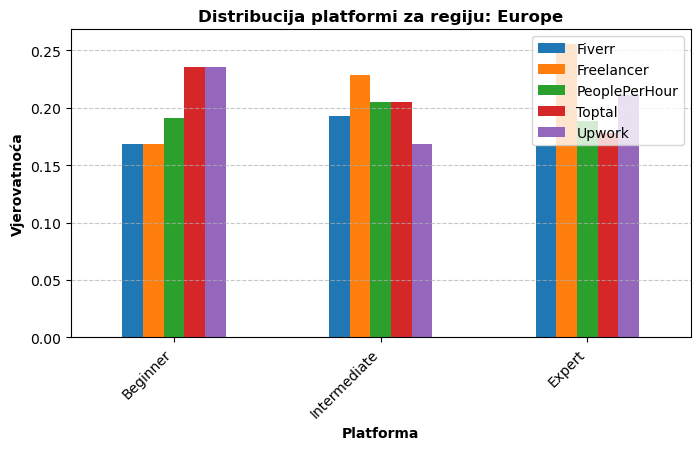

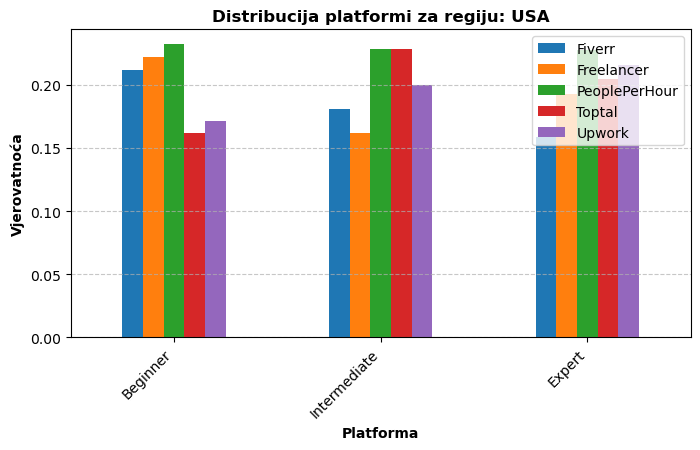

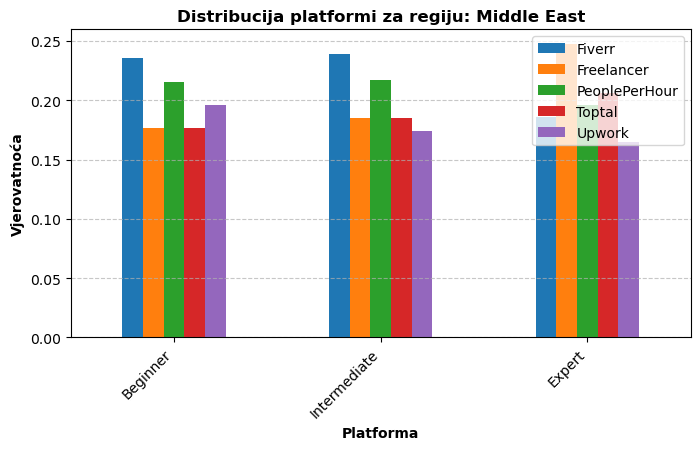

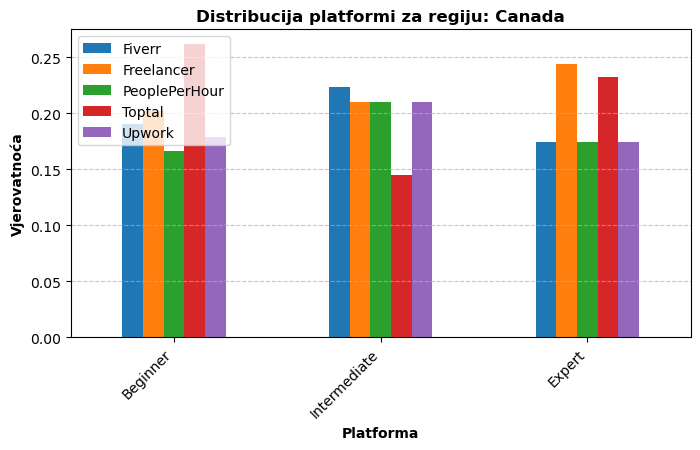

In [ ]:
# Define the experience levels and regions
experience_levels = ["Beginner", "Intermediate", "Expert"]
regions = df["Region"].unique()  # Get unique regions from the dataset

# Iterate over each combination of experience level and region
#for experience_level in experience_levels:
#    for region in regions:
#        count = len(df.query(f"(Experience_Level == '{experience_level}') & (Region == '{region}')"))
#        print(f"Number of freelancers with experience level '{experience_level}' in region '{region}': {count}")

def conditional_probability_platform_experience_level_region(df, platform, experience_level, region):
    return len(df.query(f"(Platform == '{platform}') & (Experience_Level == '{experience_level}') & (Region == '{region}')")) / len(df.query(f"(Experience_Level == '{experience_level}') & (Region == '{region}')"))
"""
for region in regions:
    for experience_level in experience_levels:
        for platform in {"Fiverr", "Freelancer", "PeoplePerHour", "Toptal", "Upwork"}:
            probability = conditional_probability_platform_experience_level_region(df, platform, experience_level, region)
            print(f"Uvjetna vjerovatnoća da freelancer koristi platformu '{platform}' ako je '{experience_level}' u regiji '{region}': {probability}")
"""

# Create separate bar charts for each region
for region in regions:
    # Filter data for the specific region
    region_data = heatmap_df.loc[region]
    region_data.plot(kind='bar', figsize=(8, 4), color=sns.color_palette('tab10'))
    plt.title(f"Distribucija platformi za regiju: {region}", fontweight='bold')
    plt.xlabel("Platforma", fontweight='bold')
    plt.ylabel("Vjerovatnoća", fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    #plt.tight_layout()
    plt.show()

## 4. Diskretne distribucije (Poglavlje 3)

Izaberite diskretnu varijablu, predložite distribuciju, izračunajte parametre i vjerovatnoće.

---

Kroz ovaj dio zadaće će se uzeti u razmatranje sljedeće 4 diskretne varijable. Od kojih su 2 kategorične i 1 pobrojna.

Kategorične varijable su __način plačanja (Payment_Method)__ i __način poslovanja (Project_Type)__.

Pobrojna varijabla je __dužina trajanja projekta u danima (Job_Duration_Days)__.


Ispod su definisane funkcije koje će se intenzivno koristiti kroz ovaj dio zadaće, a to su:
1. funkcija za crtanje bar-plota
1. funkcija za crtanje box-plota
1. funkcija za računanje očekivane vrijednosti, varijance i standardne devijacije numeričkih podataka
1. funkcija za računanje očekivane vrijednosti, varijance i standardne devijacije kategoričnih podataka
1. funkcije za crtanje tabele

In [ ]:
# Ovdje će biti definisane funkcije koje će se često koristiti u nastavku
def nacrtaj_bar_plota(
        df,
        kolona: str,
        title='Diskretna distribucija vjerovatnoće načina poslovanja',
        xlabel='Način poslovanja',
        ylabel='Vjerovatnoća'
    ):
    pm_df = df[kolona].value_counts(normalize=True).reset_index()
    pm_df.columns = [kolona, 'Broj']

    sns.barplot(data=pm_df, x=kolona, y='Broj', palette=['red']* len(pm_df), hue=kolona)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    pass
"""
def nacrtaj_box_plota(
        df,
        kolona: str,
        title='Distribucija trajanja posla (boxplot)',
        xlabel='Trajanje posla (dani)',
        kategorije = None
    ):
    if kategorije is None:
        pass
    sns.boxplot(x=df[kolona], color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()
    pass
"""

def nacrtaj_box_plota(
        df,
        kolona: str,
        title='Distribucija trajanja posla (boxplot)',
        xlabel='Vrijednosti',
        kategorije=None
    ):
    plt.figure(figsize=(14, 6))  # Možeš prilagoditi veličinu

    if kategorije is None:
        sns.boxplot(x=df[kolona], color='red')
        plt.xlabel(xlabel)
    else:
        sns.boxplot(x=kategorije, y=kolona, data=df, palette='Reds', hue=kategorije)  # ili palette='Set2'
        plt.xlabel('')
        plt.ylabel(xlabel)

    plt.title(title)

    plt.tight_layout()
    plt.show()

def nacrtaj_heatmap(
        df: pd.DataFrame,
        xkolona: str,
        ykolona: str,
        title: str ='Heatmap of Job Category vs Client Region (Crypto Payments Only)',
        xlabel: str = 'Client Region',
        ylabel: str = 'Job Category'
    ):
    #heatmap_data = pd.crosstab(df['Job_Category'], df['Client_Region'], normalize='index')
    heatmap_data = pd.crosstab(df[ykolona], df[xkolona], normalize='index')
    # Plot the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='OrRd', fmt='.2f')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()
    pass

def izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
        df,
        kolona: str,
        normalize=True
    ):
    pm_df = df[kolona].value_counts(normalize=normalize).reset_index()
    pm_df.columns = [kolona, 'Probability']

    expected_value = (pm_df[kolona] * pm_df['Probability']).sum()
    variance = ((pm_df[kolona]-expected_value)**2 * pm_df['Probability']).sum()
    return expected_value, variance, np.sqrt(variance)

def kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
        df,
        kolona: str,
        normalize=True
    ):
    # Dodijeliti numerički kod svakoj kategoriji
    kategorije = df[kolona].value_counts().index.tolist()
    kodovi = {k: i+1 for i, k in enumerate(kategorije)}  # Početak od 1, može i od 0

    # Kreiraj tablicu vjerovatnoća
    pm_df = df[kolona].value_counts(normalize=normalize).reset_index()
    pm_df.columns = [kolona, 'Probability']

    # Dodaj kolonu s numeričkim kodovima
    pm_df['Kod'] = pm_df[kolona].map(kodovi)

    # Izračuni
    expected_value = (pm_df['Kod'] * pm_df['Probability']).sum()
    variance = ((pm_df['Kod'] - expected_value) ** 2 * pm_df['Probability']).sum()

    return expected_value, variance, np.sqrt(variance)

def ispisi_tabelu(
        df: pd.DataFrame,
        kolona:str,
        koliko=10,
        normalize=True,
        naziv_tabele: str='Diskretna distribucija vjerovatnoće trajanja posla',
        indeksiraj=False,
        broj_tabele=-1
    ):
    # Broj ponavljanja
    counts = df[kolona].value_counts()
    # Vjerovatnoće
    probs = df[kolona].value_counts(normalize=normalize)

    # Kombinovanje u jedan DataFrame
    pm_df = counts.to_frame(name='Broj').join(probs.to_frame(name='Vjerovatnoća')).reset_index()
    pm_df.columns = [kolona, 'Broj', 'Vjerovatnoća']
    #pm_df = df[kolona].value_counts(normalize=normalize).reset_index()
    #pm_df.columns = [kolona, 'Broj']
    if indeksiraj:
        pm_df.insert(1, "Indeks", range(1, len(pm_df) + 1))
    html = f"""
<hr>
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column">

  {pm_df.head(koliko).to_html(index=False)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela {broj_tabele}: {naziv_tabele}
  </p>

</div>
<hr>
"""
    display(HTML(html))
    pass

def ispisi_tabelu_rezultata(
        df: pd.DataFrame,
        naziv_tabele: str='Diskretna distribucija vjerovatnoće trajanja posla',
        broj_tabele=-1
    ):
    html = f"""
<hr>
<div style="margin-top: 20px;display: flex; justify-content: center;flex-direction:column">

  {df.head(100).to_html(index=False)}
  <p style="text-align: center; font-style: bold; margin-bottom: 10px;">
    Tabela {broj_tabele}: {naziv_tabele}
  </p>

</div>
<hr>
"""
    display(HTML(html))
    pass


### Analiza varijable način poslovanja (Project_Type)

Podatke ćemo prikazati tabelarno i preko bar-plota.
Tabelarno, da bi mogli vidjeti konkretne brojeve i vjerovatnoće za svaku vrijednost koju razmatramo, a preko bar-plota ćemo vizualno predstaviti podatke.

Pošto se radi o kategoričnim podacima, biće ih potrebno indeksirati, kako bi mogli vršiti proračune na njima.

Project_Type,Indeks,Broj,Vjerovatnoća
Fixed,1,997,0.511282
Hourly,2,953,0.488718


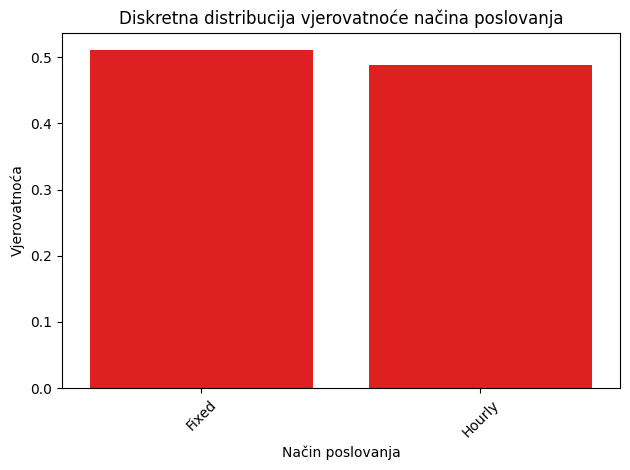

In [ ]:
ispisi_tabelu(
    df,
    kolona='Project_Type',
    naziv_tabele='Tabelarni prikaz podataka s njihovim indeksom, brojem i vjerovatnoćom',
    indeksiraj=True
)
nacrtaj_bar_plota(
    df,
    kolona="Project_Type",
    title='Diskretna distribucija vjerovatnoće načina poslovanja',
    xlabel='Način poslovanja',
    ylabel='Vjerovatnoća'
)

Na osnovu grafa vidimo da nema značajnih razlika u učestalosti između načina poslovanja. Kategorije su prilično ravnomjerno raspoređeni s neznatnom naklonošću prema fiksnom načinu poslovanja u odnosu na plaćanje po satu.

Sad ćemo izračunati očekivanu vrijednost i varijansu za cijelu distribuciju:

In [ ]:
expected_value, variance, _ = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
    df,
    kolona='Project_Type',
    normalize=True
)

ispisi_tabelu_rezultata(
    pd.DataFrame(
        data={
            "Očekivana vrijednost":[expected_value],
            "Varijansa":[variance]
            ,"Standardna devijacija":[_]
        }
    ),
    naziv_tabele='Očekivana vrijednost i varijansa za tip projekta'
)


Očekivana vrijednost,Varijansa,Standardna devijacija
1.488718,0.249873,0.499873


Pošto nije intuitivno posmatrati vrijednost varijanse, također smo izračunali i standardnu devijaciju. Kako smo indeksirali kategorije, očekivana vrijednost 1.49 nam govori da se prosječna kategorija nalazi negdje na pola puta fiksnog poslovanja i poslovanja na sat, što nam je indikacija da su kategorije ravnomjerno raspoređeni.
Varijansa i standardna devijacija su za ovu varijablu praktično maksimalne moguće, jer se ovdje radi o binarnoj distribuciji, a tu je su varijansa i standardna devijacija najveće kada obije kategorije jednako vjerovatne, što je ovdje praktično slučaj (51% i 49%).

Pošto na globalnom nivou dobivamo totalno ravnomjernu distribuciju, hajmo također pogledati kakva je distribucija za načine poslovanja po platformama. Heat mapa bi nam mogla biti najkompaktnije rješenje za grafičku reprezentaciju distribucije vjerovatnoće.

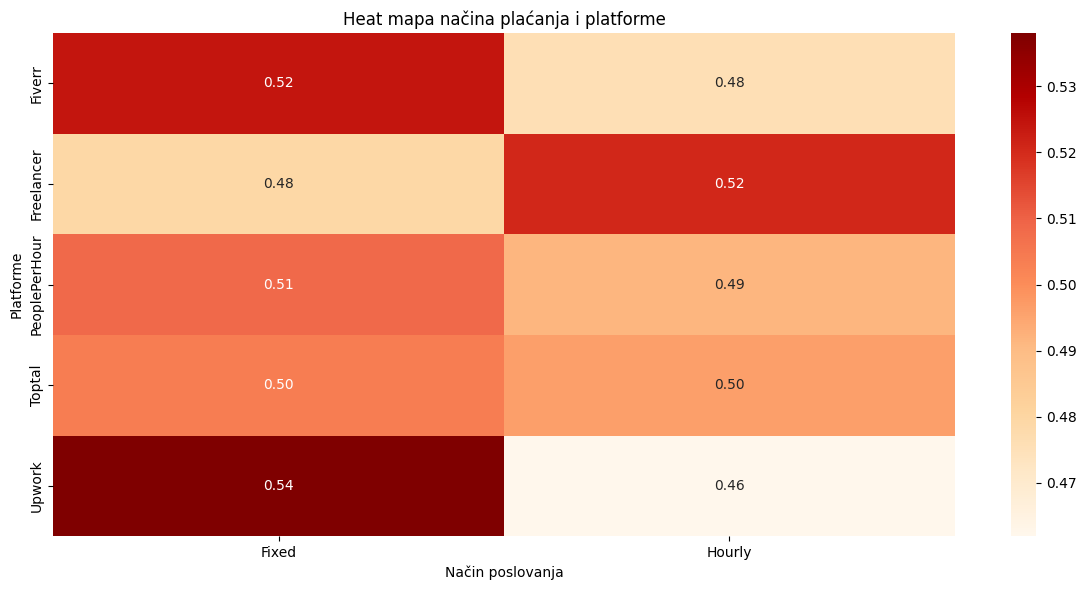

In [ ]:
nacrtaj_heatmap(
    df,
    xkolona="Project_Type",
    ykolona="Platform",
    title ='Heat mapa načina poslovanja i platforme',
    xlabel = 'Način poslovanja',
    ylabel = 'Platforme'
)

Već na osnovu slike možemo vidjeti da nema neke razlike između distribucija vjerovatnoća načina poslovanja po regijama, tako da ćemo pogledati postoji li neka razlika među tipovima posla i regijama. Također ćemo koristiti heat mapu.

Počinjemo od razmatranja distribucije načina poslovanja po tipovima posla.

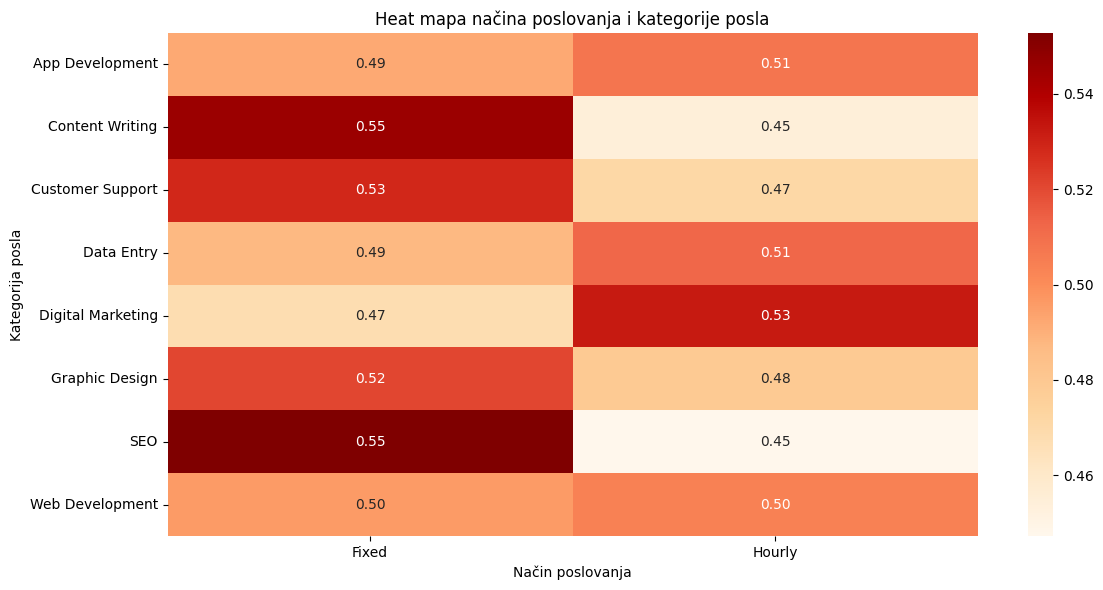

In [ ]:
nacrtaj_heatmap(
    df,
    xkolona="Project_Type",
    ykolona="Job_Category",
    title ='Heat mapa načina poslovanja i kategorije posla',
    xlabel = 'Način poslovanja',
    ylabel = 'Kategorija posla'
)


Na heat mapi možemo vidjeti veća odstupanja kod Content Writinga i SEOa. izračunat ćemo očeivanu vrijednost i varijansu za njih.

In [ ]:
rezultati = []
# Prođi kroz sve kategorije posla
for jc in df['Job_Category'].unique():
    # Izračunaj
    expected_value, variance, std_dev = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
        df[df['Job_Category'] == jc],
        kolona='Project_Type',
        normalize=True
    )
    # Pohrani
    rezultati.append({
        'Project_Type': jc,
        'Očekivana vrijednost': expected_value,
        'Varijansa': variance,
        'Standardna devijacija': std_dev
    })

# Prikaži tabelu
ispisi_tabelu_rezultata(
    pd.DataFrame(rezultati),
    naziv_tabele='Očekivana vrijednost i varijansa po kategoriji posla'
)

Project_Type,Očekivana vrijednost,Varijansa,Standardna devijacija
Web Development,1.496094,0.249985,0.499985
App Development,1.491935,0.249935,0.499935
Data Entry,1.487395,0.249841,0.499841
Digital Marketing,1.467532,0.248946,0.498945
Customer Support,1.471311,0.249177,0.499176
Content Writing,1.454545,0.247934,0.497930
Graphic Design,1.479245,0.249569,0.499569
SEO,1.447257,0.247218,0.497210


Možemo vidjeti da su ekstremi u pitanju neznatni i mogu se ignorisati.

Sad ćemo pogledati distribuciju načina poslovanja po regijama u nadi da ćemo naći nešto veću varijansu.

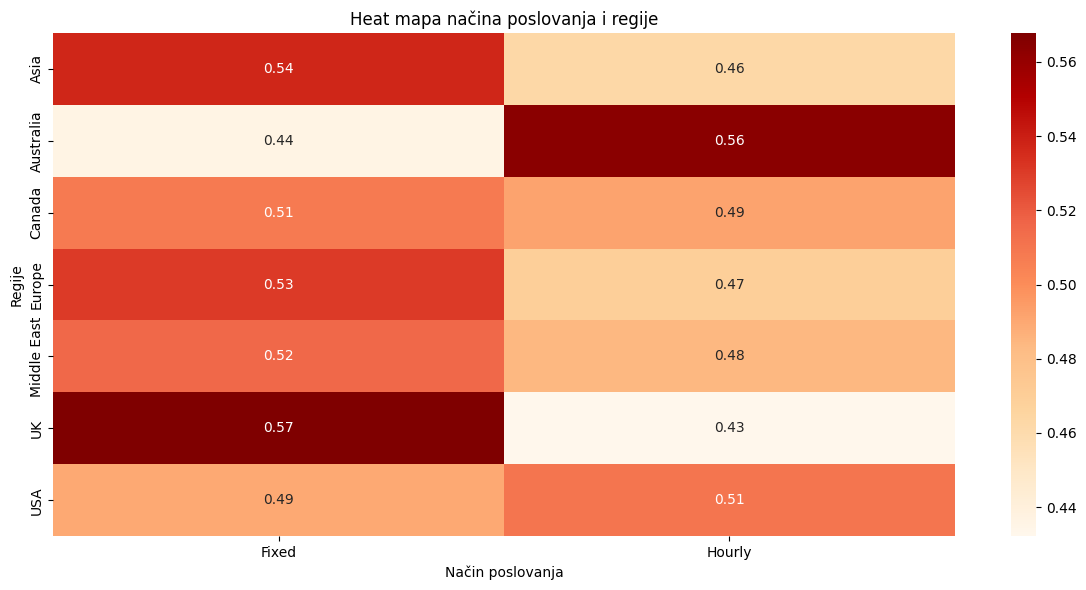

In [ ]:
nacrtaj_heatmap(
    df,
    xkolona="Project_Type",
    ykolona="Region",
    title ='Heat mapa načina poslovanja i regije',
    xlabel = 'Način poslovanja',
    ylabel = 'Regije'
)

In [ ]:
rezultati = []
# Prođi kroz sve kategorije posla
#for jc in df['Job_Category'].unique():
    # Izračunaj
expected_value, variance, std_dev = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
    df[df['Region'] == 'UK'],
    kolona='Project_Type',
    normalize=True
)
# Pohrani
rezultati.append({
    'Project_Type': jc,
    'Očekivana vrijednost': expected_value,
    'Varijansa': variance,
    'Standardna devijacija': std_dev
})

# Prikaži tabelu
ispisi_tabelu_rezultata(
    pd.DataFrame(rezultati),
    naziv_tabele='Očekivana vrijednost i varijansa tipa projekta u UK'
)

Project_Type,Očekivana vrijednost,Varijansa,Standardna devijacija
SEO,1.432143,0.245395,0.495374


Možemo vidjeti da nismo dobili nikakvu drugačiju sliko od one koju smo imali tako da ćemo ovdje stati s istraživanjem.

#### Zaključak
Iz predložene analize možemo zaključiti da je Distribucija načina poslovanja praktično konstantna, neovisno gledali region, kategoriju posla, platforme ili način poslovanja u globalu.

### Analiza varijable trajanje posla u danima (Job_Duration_Days)

Distribuciju ćemo prikazati preko box-plota, pošto je previše unikatnih vrijednosti za bar-plot, na kojem se one ne bi jasno mogle očitati.

Tabelarni prikaz će isto biti izazovan za prikazati zbog količine podataka, tako da ćemo prikazati samo medijanu, kvartile, minimalnu i maksimalnu vrijednost s box-plota.


Min,Q1,Median,Q3,Max
1,22,45,67,89


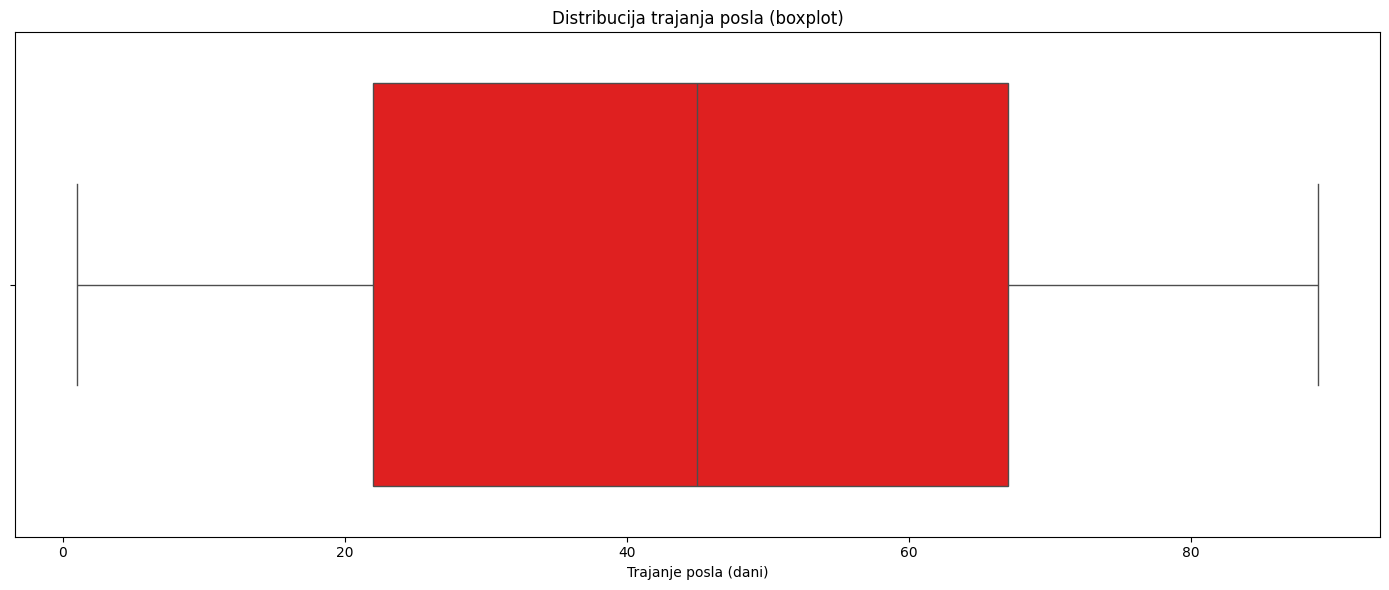

In [ ]:
ispisi_tabelu_rezultata(
    df=pd.DataFrame(
        data={
            "Min":[int(df['Job_Duration_Days'].min())],
            "Q1":[int(df['Job_Duration_Days'].quantile(.25))],
            "Median":[int(df['Job_Duration_Days'].median())],
            "Q3":[int(df['Job_Duration_Days'].quantile(.75))],
            "Max":[int(df['Job_Duration_Days'].max())],
        }
    ),
    naziv_tabele='Tabela kvartila'
)
nacrtaj_box_plota(
    df,
    kolona='Job_Duration_Days',
    title='Distribucija trajanja posla (boxplot)',
    xlabel='Trajanje posla (dani)'
)

Sad ćemo izračunati očekivanu vrijednost i varijansu

In [ ]:
expected_value, variance, _ = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
    df,
    kolona='Job_Duration_Days',
    normalize=True
)

ispisi_tabelu_rezultata(
    pd.DataFrame(
        data={
            "Očekivana vrijednost":[expected_value],
            "Varijansa":[variance]
            ,"Standardna devijacija":[_]
        }
    ),
    naziv_tabele='Očekivana vrijednost i varijansa za trajanje posla u danima'
)

Očekivana vrijednost,Varijansa,Standardna devijacija
39.630769,630.045207,25.100701


Varijansa nam ukazuje visoku varijabilnost u podacima, a iz Box-plot grafa možemo vidjeti da većina poslova traje u rasponu od 22 do 67 dana (3 do 10 sedmica, što su vrijednosti između 1. i 3. kvartila). Postoje duži i kraći poslovi od navedenog raspona, ali u znatno manjem broju. Također vidimo da su podaci blago asimetrični ka lijevo zbog razlike u medijani i očekivanoj vrijednostije (45 i 39.63).

Pokušaćemo također analizirati da li kategorija poslovanja utiće na distribuciju trajanja poslova. Opet ćemo podatke prikazati preko tabele i box-plota, ali ćemo na istoj slici posmatrati sve box-plotove.

Kategorija posla,Min,Q1,Median,Q3,Max
Web Development,1,25,50,70,89
App Development,1,23,45,70,89
Data Entry,1,24,45,67,89
Digital Marketing,1,23,45,66,89
Customer Support,1,20,44,68,89
Content Writing,1,19,45,66,89
Graphic Design,1,22,44,68,89
SEO,1,20,41,66,89


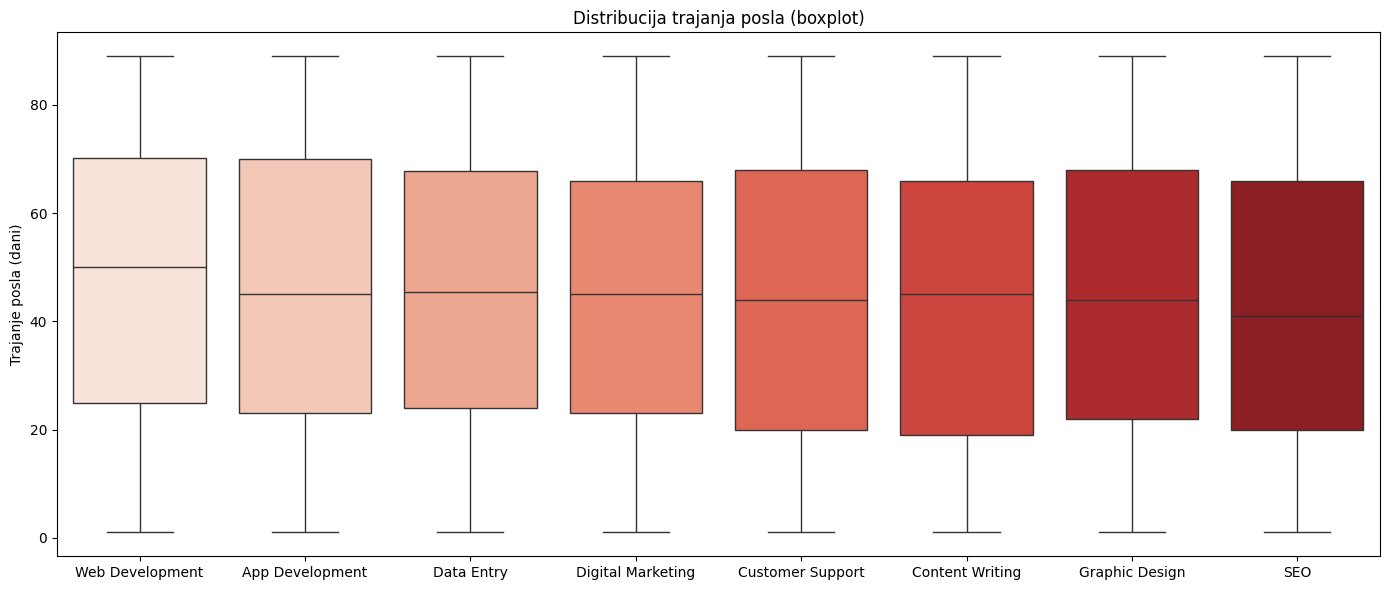

In [ ]:
rezultati = []
for jc in df['Job_Category'].unique():
    trenutni_df=df[df['Job_Category'] == jc]
    rezultati.append({
        "Kategorija posla": jc,
        "Min":int(trenutni_df['Job_Duration_Days'].min()),
        "Q1":int(trenutni_df['Job_Duration_Days'].quantile(.25)),
        "Median":int(trenutni_df['Job_Duration_Days'].median()),
        "Q3":int(trenutni_df['Job_Duration_Days'].quantile(.75)),
        "Max":int(trenutni_df['Job_Duration_Days'].max()),
    })

ispisi_tabelu_rezultata(
    df=pd.DataFrame(rezultati),
    naziv_tabele='Tabela kvartila'
)

nacrtaj_box_plota(
    df,
    kolona='Job_Duration_Days',
    title='Distribucija trajanja posla (boxplot)',
    xlabel='Trajanje posla (dani)',
    kategorije="Job_Category"
)



Interesantno je vidjeti da su maksimalna i minimalna vrijednost iste u svim kategorijama, ali isto tako vidimo da su i distribucije praktično iste.

Izračunaćemo očekivanu vrijednost i varijansu za svaki box-plot.

In [ ]:
rezultati = []
# Prođi kroz sve kategorije posla
for jc in df['Job_Category'].unique():
    # Izračunaj
    expected_value, variance, std_dev = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
        df[df['Job_Category'] == jc],
        kolona='Job_Duration_Days',
        normalize=True
    )
    # Pohrani
    rezultati.append({
        'Job_Category': jc,
        'Očekivana vrijednost': expected_value,
        'Varijansa': variance,
        'Standardna devijacija': std_dev
    })

# Prikaži tabelu
ispisi_tabelu_rezultata(
    pd.DataFrame(rezultati),
    naziv_tabele='Očekivana vrijednost i varijansa po kategoriji posla'
)


Job_Category,Očekivana vrijednost,Varijansa,Standardna devijacija
Web Development,31.003906,502.191391,22.409627
App Development,30.741935,492.247919,22.186661
Data Entry,30.050420,459.636113,21.439126
Digital Marketing,30.640693,493.728041,22.219992
Customer Support,30.901639,504.334587,22.457395
Content Writing,31.402597,500.379041,22.369154
Graphic Design,32.430189,520.803617,22.821122
SEO,29.616034,502.979152,22.427197


Možemo vidjeti da je i po pojedinačnim kategorijama ista distribucija, praktično iste očekivane vrijednosti i varijanse, isto su za sve kategorije asimetrični podaci ulijevo zbog razlike u medijani i očekivanoj vrijednosti. Pogledaćemo postoji li povezanost dužine posla s načinom plaćanja. Možda nešto interesantno bude.

Kategorija posla,Min,Q1,Median,Q3,Max
Mobile Banking,1,21,45,69,89
Crypto,1,21,46,68,89
Bank Transfer,1,22,42,63,89
PayPal,1,23,46,67,89


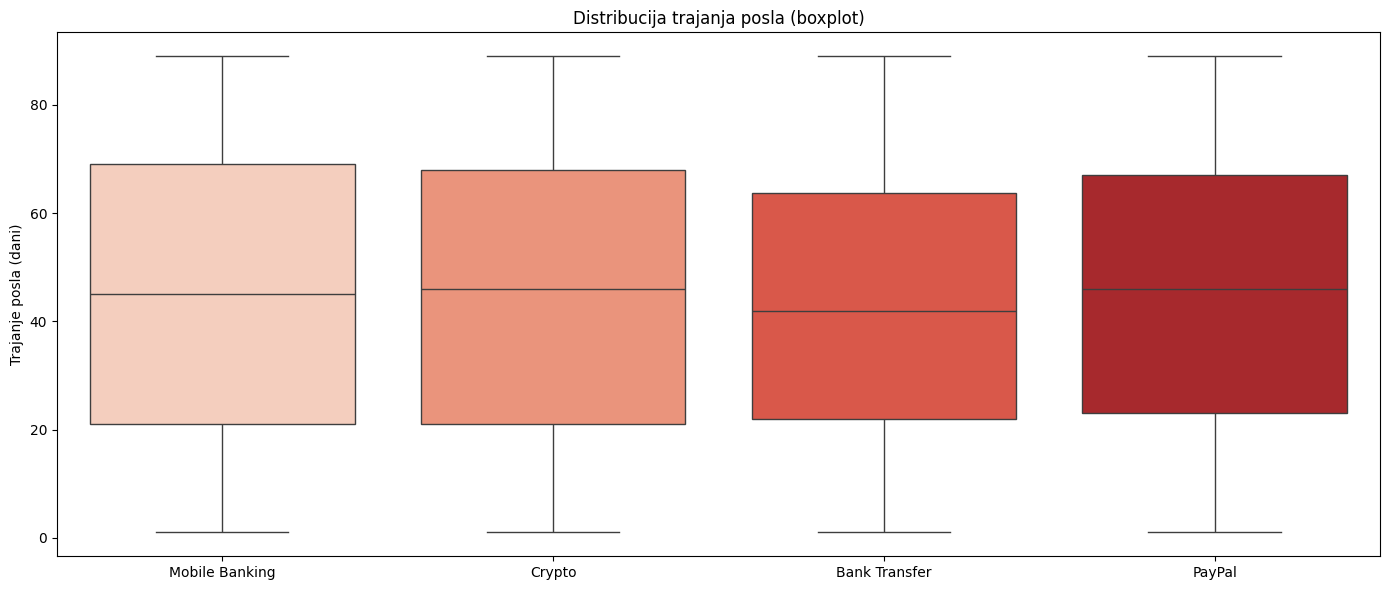

In [ ]:
rezultati = []
for jc in df['Payment_Method'].unique():
    trenutni_df=df[df['Payment_Method'] == jc]
    rezultati.append({
        "Kategorija posla": jc,
        "Min":int(trenutni_df['Job_Duration_Days'].min()),
        "Q1":int(trenutni_df['Job_Duration_Days'].quantile(.25)),
        "Median":int(trenutni_df['Job_Duration_Days'].median()),
        "Q3":int(trenutni_df['Job_Duration_Days'].quantile(.75)),
        "Max":int(trenutni_df['Job_Duration_Days'].max()),
    })

ispisi_tabelu_rezultata(
    df=pd.DataFrame(rezultati),
    naziv_tabele='Tabela kvartila'
)

nacrtaj_box_plota(
    df,
    kolona='Job_Duration_Days',
    title='Distribucija trajanja posla (boxplot)',
    xlabel='Trajanje posla (dani)',
    kategorije="Payment_Method"
)

Pošto smo dobili potpuno iste vrijednosti kao kod distribucije trajanja posla po kategorijama i u globalu, nećemo se zamarati s računanjem srednje vrijednosti i varijanse.

#### Zaključak
Dužina trajanja posla ne ovisi od kategorije posla, ni o načinu plaćanja i podaci su vrlo dobro distribuirani.

### Analiza varijable način plaćanja (Payment_Method)

Distribuciju ćemo prikazati tabelarno i preko bar-plota.
Tabelarno, da bi mogli vidjeti konkretne brojeve i vjerovatnoće za svaku vrijednost koju razmatramo, a preko bar-plota ćemo vizualno predstaviti podatke.

Pošto se radi o kategoričnim podacima, biće ih potrebno indeksirati, kako bi mogli vršiti proračune na njima.

Payment_Method,Indeks,Broj,Vjerovatnoća
Crypto,1,514,0.263590
Bank Transfer,2,494,0.253333
Mobile Banking,3,476,0.244103
PayPal,4,466,0.238974


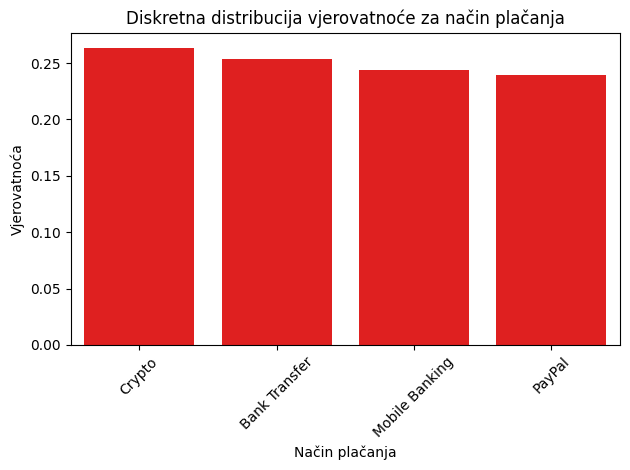

In [ ]:
ispisi_tabelu(
    df,
    kolona='Payment_Method',
    indeksiraj=True
)
nacrtaj_bar_plota(
    df,
    'Payment_Method',
    'Diskretna distribucija vjerovatnoće za način plačanja',
    'Način plačanja',
    'Vjerovatnoća'
)

Na bar-plotu vidimo da međusobne razlike u načinu plačanja nisu prevelike, ali su primjetne. Najzastupljeniji način plačanja je kripto, dok je PayPal najmanje korišten.  

Sad ćemo izračunati očekivanu vrijednost i varijansu za svaku vrijednost


In [ ]:
expected_value, variance, _ = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
    df,
    kolona='Payment_Method',
    normalize=True
)

ispisi_tabelu_rezultata(
    pd.DataFrame(
        data={
            "Očekivana vrijednost":[expected_value],
            "Varijansa":[variance],
            "Standardna devijacija":[_]
        }
    ),
    naziv_tabele="Očekivana vrijednost i varijansa za načina plaćanja"
)


Očekivana vrijednost,Varijansa,Standardna devijacija
2.458462,1.253403,1.119555


Vidimo da je očekivana vrijednost oko 2.45. To znači da u prosjeku možemo očekivati da će se plačanje prije izvršiti preko mobilnog bankarstva ili bankovne transakcije, nego preko kripta i PayPala. Varijansa i standardna devijacija pokazuju da postoji varijabilnost među podacima, ali nije velika, što smo mogli vidjeti i u bar-plotu.

Trebalo bi se ispitati kakva je distribucija načina plaćanja po kategorijama poslova i regijama.

Počećemo od analize distribucije načina plaćanja po kategorijama posla preko heat-mape.

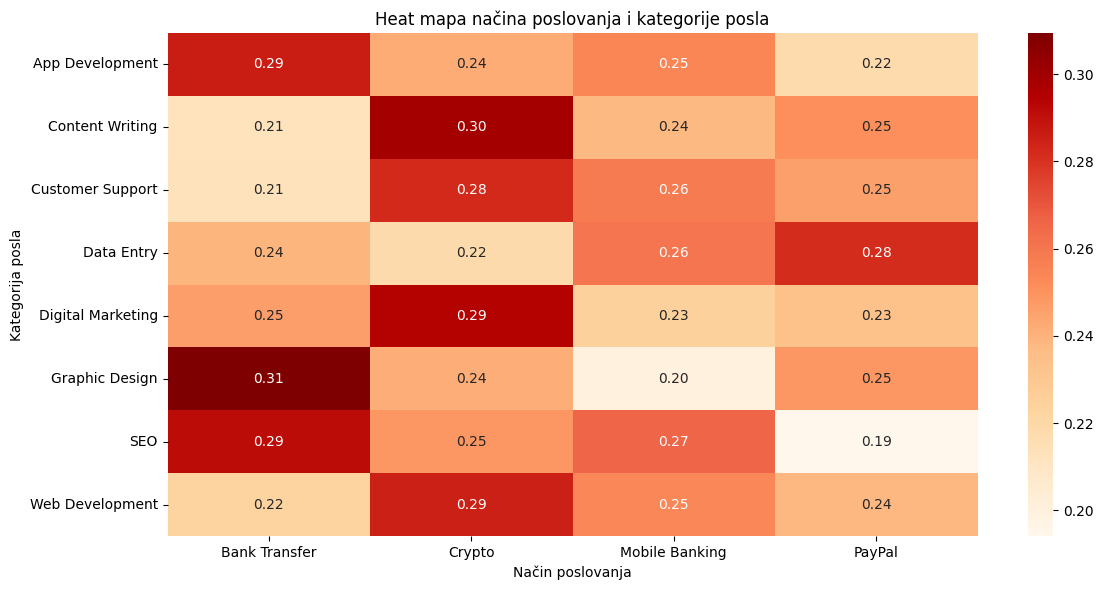

In [ ]:
nacrtaj_heatmap(
    df,
    xkolona="Payment_Method",
    ykolona="Job_Category",
    title ='Heat mapa načina poslovanja i kategorije posla',
    xlabel = 'Način poslovanja',
    ylabel = 'Kategorija posla'
)

Iz heat mape možemo vidjeti malo veća odstupanja, od kakvih smo navikli u ovom dijelu zadaće, kod Content Writinga, SEO i Graphic Designa (oko 10% razlike između najmanje i najveće vjerovatnoće). Izračunat ćemo srednju vrijednost i varijansu načina plačanja za za navedene kategorije da vidimo hoćemo li dobiti nešto drugačiju varijansu i očekivanu vrijednost.

In [ ]:
rezultati = []
za_ispitati = ['Content Writing','SEO','Graphic Design']
# Prođi kroz sve kategorije posla
for jc in za_ispitati:
    # Izračunaj
    expected_value, variance, std_dev = kategoricki_izracunaj_ocekivanu_vrijednost__varijancu__standardnu_devijaciju(
        df[df['Job_Category'] == jc],
        kolona='Payment_Method',
        normalize=True
    )
    # Pohrani
    rezultati.append({
        'Job_Category': jc,
        'Očekivana vrijednost': expected_value,
        'Varijansa': variance,
        'Standardna devijacija': std_dev
    })

# Prikaži tabelu
ispisi_tabelu_rezultata(
    pd.DataFrame(rezultati),
    naziv_tabele='Očekivana vrijednost i varijansa po kategoriji posla'
)

Job_Category,Očekivana vrijednost,Varijansa,Standardna devijacija
Content Writing,2.363636,1.253050,1.119397
SEO,2.345992,1.196746,1.093959
Graphic Design,2.332075,1.240669,1.113853


Varijansa je ostala ista, ali srednja vrijednost malo niža u odnosu u globalu, što znaći da je u ovim ekstremnijim slučajevima vjerovatnije da se plaćanje izvršilo preko bankovne tranzakcije.

#### Zaključak
Najćešći načini plaćanja su preko mobilnog bankarstva ili bankovne transakcije, gdje su bankovne transakcije malo zastupljenije u ekstremnijim slučajevima.


## 5. Kontinuirane distribucije (Poglavlje 4)

##### Odaberite tri do četiri kontinualne varijable i vizualizirajte njihove distribucije.
---

Sada ćemo analizirati neke kontinualne varijable i pogledati kakve su njihove distribucije. Biramo 'Job_Success_Rate', 'Client_Rating' i 'Rehire_Rate'.

Prvo pogledajmo Job_Success_rate.

[Text(0.5, 0, '')]

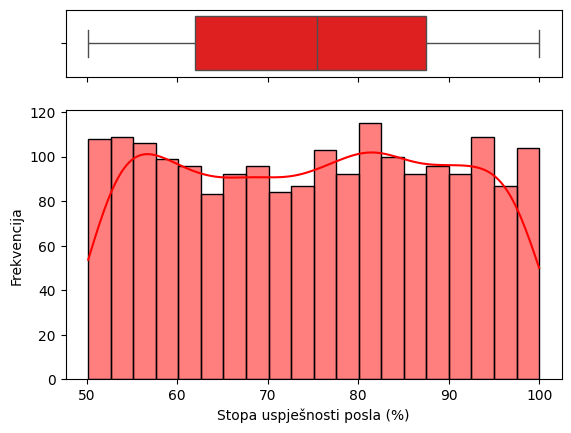

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
sns.boxplot(data=df, x="Job_Success_Rate", ax=ax_box, color='red')
plt.xlabel('Stopa uspješnosti posla (%)')
plt.ylabel('Frekvencija')
sns.histplot(data=df, x="Job_Success_Rate", kde='True', bins = 20, ax=ax_hist, color='red')
ax_box.set(xlabel='')


Ono što možemo da primjetimo iz histograma normalne distribucije i što nam krivulja gustoće prikazuje jeste da je funkcija dosta "ravna" osim pri samim vrijednostima minimuma i maksimuma kada je primjetno da naglo opada iz razloga što se u tim slučajevima vjerovatnoća pojavljivanja naglo smanjuje, dok se kod nas dešava situacija da se frekvencija freelancera sa velikom uspješnošću uopšte ne smanjuje. To nam govori da raspoloživi podaci uopšte nisu normalno distribuisani i da se radi o vrlo neuobičajenom uzorku kojeg analiziramo.

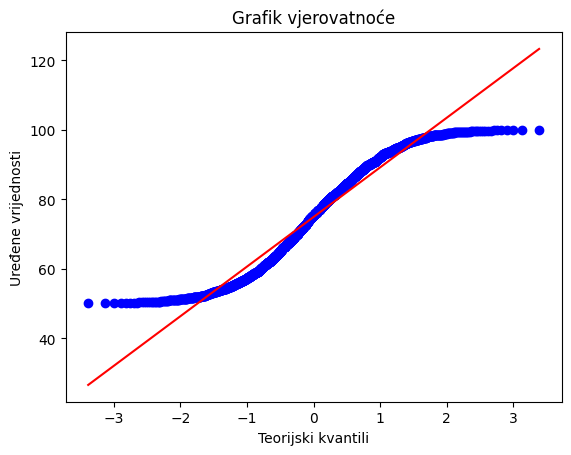

In [ ]:
import scipy.stats as stats
stats.probplot(df.Job_Success_Rate.dropna(), plot=plt)
plt.title('Grafik vjerovatnoće')
plt.ylabel('Uređene vrijednosti')
plt.xlabel('Teorijski kvantili')
plt.show()

Ovaj grafik vjerovatnoće bi trebao da bude još jedan pokazatelj distribucije analiziranih podataka i njene normalnosti. Vidljiva su velika odstupanja od prave koja predstavlja normalnu distribuciju što dodatno potvrđuje ono što smo mogli vidjeti na histogramu, a to je da radimo sa vrlo "čudnim" podacima.

In [ ]:
uspjesni = df[df['Job_Success_Rate'] >= 95]
count = len(uspjesni)
#i = count/1950 * 100
#print(i)
#round(df.describe(), 1)

Sada pogledajmo varijablu 'Client_Rating'. Analiza ove varijable će nam dati uvid u zadovoljstvo klijenata sa dobijenim proizvodom.

[Text(0.5, 0, '')]

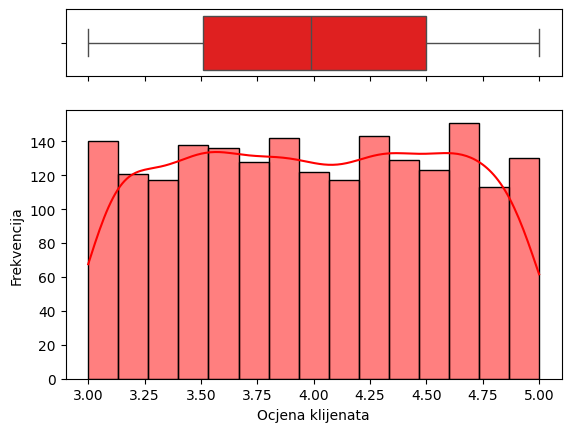

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
sns.boxplot(data=df, x="Client_Rating", ax=ax_box, color='red')
plt.xlabel('Ocjena klijenata')
plt.ylabel('Frekvencija')
sns.histplot(data=df, x="Client_Rating", kde='True', bins = 15, ax=ax_hist, color='red')
ax_box.set(xlabel='')

Da se primjetiti da KDE na većini vrijednosti dosta odgovara realnom stanju, međutim, primjetno je da imamo sličnu situaciju na krajevima prostora uzorka gdje se pojavljuje veći broj slučajeva nego što se obično očekuje. Ova situacija dosta podsjeća na prethodnu sa slučajem Job_Success_Rate.Zanimljivo je i da svi klijenti daju ocjene od 3-5, što nije baš lahko objašnjivo.

Još ćemo pogledati distribuciju varijable 'Rehire_Rate'. Ona bi nam mogla pokazati koliko se klijenti odlučuju da u budućim saradnjama biraju iste freelancere.

[Text(0.5, 0, '')]

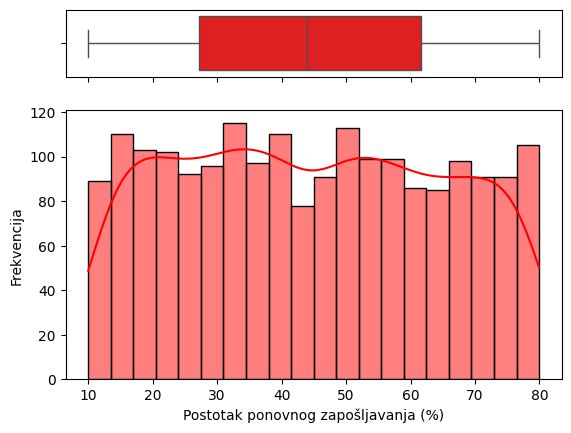

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
sns.boxplot(data=df, x="Rehire_Rate", ax=ax_box, color='red')
plt.xlabel('Postotak ponovnog zapošljavanja (%)')
plt.ylabel('Frekvencija')
sns.histplot(data=df, x="Rehire_Rate", kde='True', bins = 20, ax=ax_hist, color='red')
ax_box.set(xlabel='')

Kao i u prethodna dva slučaja, vidimo isti trend. Na krajevima prostora uzorka se dešava jako puno neprirodnih događaja jer imamo puno više slučajeva freelancera koji vrlo često ili vrlo rijetko budu ponovo zaposleni od strane istog klijenta, što je nešto vrlo zanimljivo i teško za objasniti čak i ako je bilo stratifikovano prikupljanje podataka.

Sada ćemo nastaviti analizu ovih podataka na malo drugačiji način. Pogledati ćemo njihovu varijansu i očekivanu vrijednost.

In [ ]:
expected_values = df[['Job_Success_Rate', 'Client_Rating', 'Rehire_Rate']].mean()

variances = df[['Job_Success_Rate', 'Client_Rating', 'Rehire_Rate']].var()

# Prikaz rezultata
print("Očekivane vrijednosti (Mean):")
print(expected_values)
print("\nVarijanse (Variance):")
print(variances)

Očekivane vrijednosti (Mean):
Job_Success_Rate    74.951846
Client_Rating        3.995892
Rehire_Rate         44.556913
dtype: float64

Varijanse (Variance):
Job_Success_Rate    213.619724
Client_Rating         0.331748
Rehire_Rate         407.791251
dtype: float64


Ono što nam dobiveni podaci govore je nešto veoma zanimljivo. Imamo ogromnu varijabilnost kod Job_Success_Rate i Rehire_Rate, a veoma malu varijabilnost kod Client_Rating. Poredeći ovo sa očekivanim vrijednostima možemo zaključiti da klijenti imaju dosta slično mišljenje o freelancerima što vidimo po maloj varijansi. To nas dovodi do zaključka da su freelanceri u velikoj mjeri dosta dobri u ispunjavanju želja klijenata. Međutim ono što je čudno i pomalo u kontrastu sa ovim zaključkom jeste što je prisutna velika varijabilnost u efikasnosti izrade poslova i u postotku ponovnog zapošljavanja freelancera od strane istih klijenata.

Freelanceri imaju oko 75% uspješnosti u obavljanju poslova što je solidno, ali velika varijabilnost govori da bi tu mogli biti neki koji dižu prosjek. Sada kada to uporedimo sa našom distribucijom vidimo da u tome nema neke istine jer je vidljiva velika frekvencija freelancera sa nižim vrijednostima. Postavlja se pitanje, šta se dešava??? Podaci koje vidimo su veoma čudni, tako da ćemo pokušati da ih analiziramo i ispitamo na drugačiji način.

## **PITANJE ?**: Da li efikasnost u poslu znači bolje prilike?

Nakon kratke analize podataka i njihove distribucije, sada je vrijeme da proanaliziramo njihove efekte u poslovnom svijetu freelancera. Zanima nas da li oni odgovorniji i vještiji freelanceri imaju bolje prilike u poslovnom svijetu, što kroz vrjednovanje njihovog posla od strane klijenata na način da će ih ponovo zaposliti ili dati veću ocjenu, što će naravno zavisiti i od kvalitete odrađenog posla, što bi također bilo vrijedno prostudirati i vidjeti da li gotov proizvod znači i dobar proizvod.

### **HIPOTEZA**: Efikasni freelanceri imaju zadovoljne, stalne klijente (Veća uspješnost u završavanju poslova znači i veću ocjenu od strane klijenata kao i veću stopu ponovnog zapošljavanja)






Sada ćemo ispitati da li ima ikakve povezanosti efikasnost freelancera sa ocjenama i odabirom klijenata da ih ponovo zaposle. Prvo gledamo poređenje sa Client_Rating.

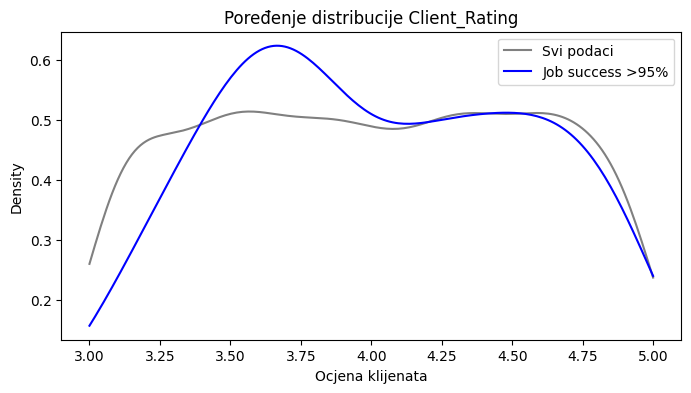

In [ ]:
high_success = df[df['Job_Success_Rate'] > 95]

plt.figure(figsize=(8, 4))
sns.kdeplot(df['Client_Rating'], label='Svi podaci', color='gray', clip=(3, 5))
sns.kdeplot(high_success['Client_Rating'], label='Job success >95%', color='blue', clip=(3, 5))
plt.title('Poređenje distribucije Client_Rating')
plt.xlabel('Ocjena klijenata')
plt.legend()
plt.show()

Ono što smo uradili jeste uporedili distribuciju svih podataka zavisno od ocjena freelancera koje su im dijelili njihovi klijenti i distribuciju specifično izdvojenih freelancera sa preko 95% uspješno završenih poslova, koje možemo nazvati najuspješnijih freelancera. Zaključak je nešto veoma bizarno: Efikasniji freelanceri dosta dobivaju ocjene ispod očekivane (3,99) od strane njihovih klijenata. Ovim je faktički oboreno pola naše hipoteze.

Sada ćemo pokušati isto, ali sa podacima iz Rehire_Rate.

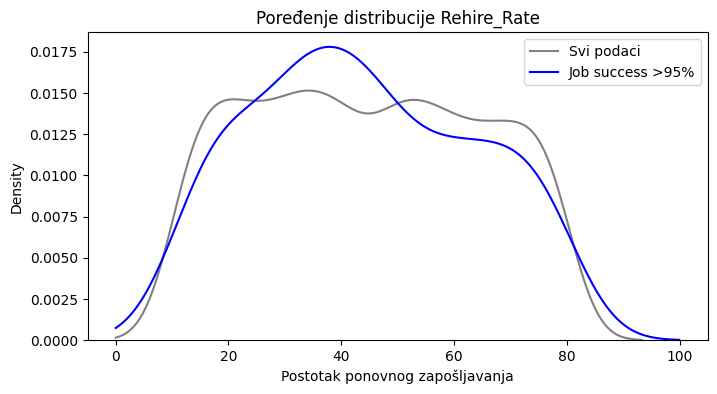

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Rehire_Rate'], label='Svi podaci', color='gray', clip=(0, 100))
sns.kdeplot(high_success['Rehire_Rate'], label='Job success >95%', color='blue', clip=(0,100))
plt.title('Poređenje distribucije Rehire_Rate')
plt.xlabel('Postotak ponovnog zapošljavanja')
plt.legend()
plt.show()

Sada vidimo za trun drugačiju situaciju, ali to i dalje nije ono što smo očekivali. Najuspješniji freelanceri imaju najveću distribuciju oko očekivane vrijednosti, možda čak i malo ispod nje. To je i dalje primjetno drugačije od distibucije sa svim podacima, međutim, ponovo je opovrgnuta naša hipoteza jer smo očekivali da će oni biti dosta više birani od svojih prethodnih klijenata. Jedino objašnjenje koje se može prihvatiti jeste da najuspješniji freelanceri biraju da predaju kakav-takav proizvod gdje se na neki način žrtvuje sama njegova kvaliteta.

### **HIPOTEZA**: Neefikasni freelanceri imaju nezadovoljne klijente i često su u potrazi za novima

Pošto smo uvidjeli maloprije da u biznisu nije sve kako se očekuje, pokušati ćemo da vidimo da li je stvarno takva realnost ili je to možda bila puka slučajnost. Pogledajmo one neefikasne freelancere. Provjerimo da li imaju više sreće i uspjeha nego elana za radom.

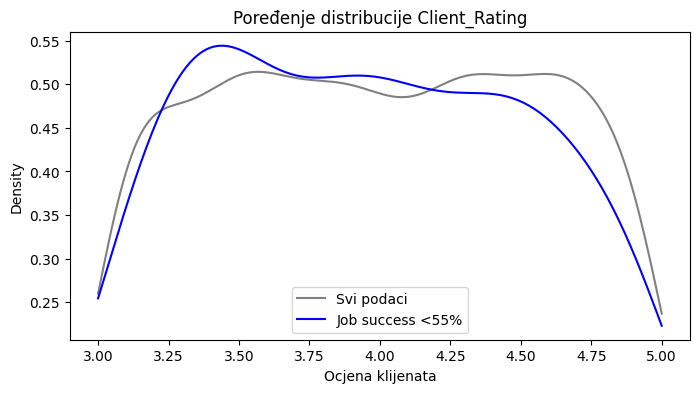

In [ ]:
low_success = df[df['Job_Success_Rate'] < 55]

plt.figure(figsize=(8, 4))
sns.kdeplot(df['Client_Rating'], label='Svi podaci', color='gray', clip=(3, 5))
sns.kdeplot(low_success['Client_Rating'], label='Job success <55%', color='blue', clip=(3, 5))
plt.title('Poređenje distribucije Client_Rating')
plt.xlabel('Ocjena klijenata')
plt.legend()
plt.show()

Prvi grafik je relativno pozitivan za naš slučaj. Vidljiva je razlika u odnosu na cijeli prostor uzorka, jer je distribucija dosta manja u dijelu sa višim ocjenama i relativno veća pri nižim ocjenama. To nam govori da su klijenti poprilično nezadovoljni sa neefikasnim freelancerima. Provjerimo da li svoje nezadovoljstvo sprovode u praksu i da li biraju da ne zapošljavaju "neradnike".

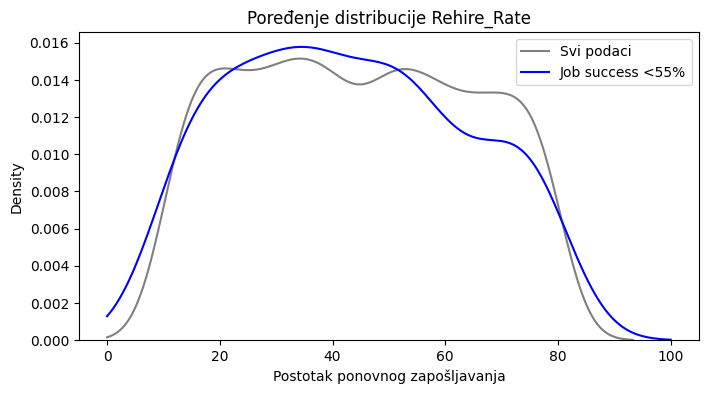

In [ ]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Rehire_Rate'], label='Svi podaci', color='gray', clip=(0, 100))
sns.kdeplot(low_success['Rehire_Rate'], label='Job success <55%', color='blue', clip=(0, 100))
plt.title('Poređenje distribucije Rehire_Rate')
plt.xlabel('Postotak ponovnog zapošljavanja')
plt.legend()
plt.show()

Čini se da nije sve tako crno i da zaista postoji razlika, prema ovom grafiku distribucije klijenti u određenom broju manje biraju neefikasne freelancere. To bi značilo da su neefikasni freelanceri više primorani da traže nove klijente nego većina freelancera, čime je i naša hipoteza potvrđena.


## **PITANJE ?**: Da li možemo početnicima preporučiti neku platformu?

Prisjetimo se naše ranije analize plaformi. Sada ćemo se vratiti na nju ali sa drugom perspektivom. Pogledati ćemo platforme specifično za slučaj freelancera početnika i vidjeti da li možemo početnici preporučiti startnu platformu?

Način na koji ćemo vršiti ovu analizu jeste da ćemo samo posmatrati zaradu početnika, ali ćemo ih svrstati u odvojene kategorije, zavisno od platforme (Fiverr, Toptal, Upwork, PeoplePerHour, Freelancer). Na platformu 'Freelancer' se misli da freelanceri nisu ni na jednoj od navedenih platformi već da klijente privlače raznim drugim načinima oglašavanja, bilo preko društvenih mreža ili preko preporuka. Analizu ćemo vršiti tipom grafika koji nije bio dosad korišten u dokumentu: violin plot. On će nam omogućiti da na zanimljiv način pogledamo distribuciju zarade freelancera po platformi.

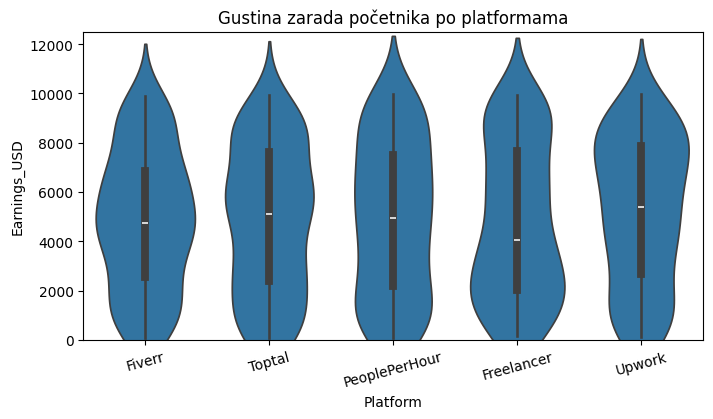

In [ ]:
df_pocetnici = df[df['Experience_Level'] == 'Beginner']
plt.figure(figsize=(8, 4))
sns.violinplot(data=df_pocetnici, x='Platform', y='Earnings_USD')
plt.title('Gustina zarada početnika po platformama')
plt.ylim(0, 12500)
plt.xticks(rotation=15)
plt.show()

Violin plot je specifičan jer u sebi sadrži i box-plot, tako da imamo "ugrađen" prikaz medijana i kvartila u samom grafiku.

Krećemo od sredine sa PeoplePerHour platformom. Violin plot je dosta jednolik u ovom slučaju što bi značilo da su poprilično podjednako zastupljene sve kategorije zarade, uz nešto niži Q1. Toptal je dosta sličan, ali je izražena veća gustina distribucije oko medijana. Fiverr ima još izraženiju takvu situaciju, uz primjetnu smanjenu gustinu oko kvartila i dosta zbijeniji box-plot. Violin plot za Freelancere dosta podsjeća na krušku i ima jako niske Q1 i medijan, dok je Upwork sušta suprotnost Freelancerima.

In [ ]:
rezultati = []
for platforma in df_pocetnici['Platform'].unique():
    zarade = df_pocetnici[df_pocetnici['Platform'] == platforma]['Earnings_USD']
    q1 = zarade.quantile(0.25)
    prosjek = round(zarade.mean(), 2)
    q3 = zarade.quantile(0.75)
    rezultati.append({'Platforma': platforma, 'Prvi kvartil': q1, 'Prosjek': prosjek, 'Treci kvartil': q3})

df_pregled = pd.DataFrame(rezultati)
print(df_pregled)


       Platforma  Prvi kvartil  Prosjek  Treci kvartil
0         Fiverr       2542.25  4857.44        6852.25
1         Toptal       2404.00  4872.29        7608.75
2  PeoplePerHour       2172.00  4931.46        7516.00
3     Freelancer       2025.00  4785.43        7668.00
4         Upwork       2690.00  5232.43        7882.00


Sada je i matematički potvrđen violin plot. Za Fiverr je primjetna velika "zbijenost" između Q1 i Q3 (koji je jako jako nizak u odnosu na ostale) i prosjek koji je "prosječan". Toptal se pokazuje kao solidna platforma koja dosta garantuje sigurnost. PeoplePerHour se pokazuje kao jako raznovrsna plaforma, gdje je tako reći sve moguće. Odabir pravog freelancinga se ovim matematičkim izračunom dosta čini kao PeoplePerHour, ali nam violin plot pokazuje pravu stranu priče i pokazuje ovaj put kao dosta rizičan u smislu zarade. Upwork je definitivno platforma koja dominira u odnosu na ostale sa distribucijama i vidimo da ima najviše i Q1 i medijan i Q3.

Nakon sve ove provedene analize, sa sigurnošću možemo reći da je Upwork platforma koju bismo preporučili početnicima, dok je put "pravog" freelancinga najrizičniji i možda bismo taj put samo najsmjelijijm i najsposobnijim preporučili.
Ova je preporuka uz jednu bitnu napomenu: odabir niti jedne plaforme neće donijeti novac tek tako, već samo trud i puno zalaganja pri radu. Svakom početniku freelanceru želimo sreću i nadu da je ova analiza bila od koristi.

## 6. Zajedničke distribucije i zavisnost (Poglavlje 5)

Analizirajte odnose između varijabli koristeći vizualne i numeričke metode.

---

Za potrebe ovog poglavlja, **nužno je pokrenuti sljedeći blok koda:**

In [221]:
from scipy.stats import chi2_contingency,spearmanr
platform_map = {'Fiverr':1, 'Freelancer': 2,'Upwork':3,'PeoplePerHour':4,'Toptal':5}   ## Indeksiramo platforme
exp_map = {'Beginner': 0, 'Intermediate': 1, 'Expert': 2}

df['Experience_Index'] = df['Experience_Level'].map(exp_map) ## Indeksiramo vrijednosti
df['Platform_Index'] = df['Platform'].map(platform_map)

U ovom poglavlju, nastojati ćemo gradivo upotrijebiti kao dodatnu potkrepu prethodnih hipoteza, te empirijski odgovoriti na češta pitanja uzročnosti i korelacije na ovu temu.

### **PITANJE ?:** Da li mjerama zajedničke distribucije i zavisnosti možemo zaključiti da je Experience_Level stvarno nasumičan?


Ovo nije nužno pitanje tematike, već samog dataseta, čiji značaj se može primjetiti kroz prethodno izvršene analize.
<br>Također, iako smo na samom početku razjasnili zašto je za konkretnije zaključke potrebno suziti populaciju, ovdje to ovdje nema smisla.
<br>Paramater je globalno definisan, i globalno mora dati konkretan i isti kriterij, a ne u određenim slučajevima i okolnostima.

Za ovo postavljamo hipotezu:


#### **HIPOTEZA:** Nivo iskustva freelancera ne zavisi od niti jednog srodnog parametra.

Kako se ovdje radi o *kategoričnim* podacima, morat ćemo uvesti par novih alata, koje nismo obrađivali na kursu:
1. **Spearmanova korelacija:**<br>
    Na kursu smo obradili *Pearsonovu korelaciju* koja ispituje linearnu vezu između dvije kontinualne vrijednosti i pretpostavlja normalnu distribuciju.
    Spearmanova distribucija ispituje monotone veze dvije rangirane vrijednosti.<br>
    *(Za kod, potreban je scipy.stats)*<br><br>
2. **P-vrijednosti:** Vrijednosti koje daju mjerodavnost ispitanom parametru. Pri prvom posmatranju, ukoliko je p < 0.05, možemo eliminirati kao slučajnost.<br><br>
3. **Chi-square** $(\chi^2 = \sum \frac{(O - E)^2}{E})$:<br>
   Chi-square pomaže pri određivanju veze između dvije kategoričke vrijednosti, tako što distribucije obe vrijednosti upoređuje sa očekivanom distribucijom kojom bi imali da zavise jedna od druge.

In [222]:


def spearman_pvalues(df, group_col, numeric_cols):
    results = {}
    for col in numeric_cols:

        valid_data = df[[group_col, col]]
        if valid_data[group_col].nunique() > 1 and valid_data[col].nunique() > 1:
            rho, p = spearmanr(valid_data[group_col], valid_data[col]) ## Rho - Spearman korelacija, p - P-vrijednost
            results[col] = (rho, p)
        else:
            results[col] = None
    return results
# Funkcija za Chi-Square test (kategorijske varijable)
def chi_square_pvalues(df, group_col, cat_cols):
    results = {}
    for col in cat_cols:
        contingency = pd.crosstab(df[group_col], df[col])
        if contingency.shape[0] > 1 and contingency.shape[1] > 1:
            corr, p, _, _ = chi2_contingency(contingency)
            results[col] = (corr, p)  # Corr - Chi-Square statistika, p - Pvrijednost
        else:
            results[col] = None
    return results

# Definišane kolone
categorical_columns = ['Job_Category', 'Platform', 'Region', 'Payment_Method', 'Project_Type']
numeric_columns = ['Job_Completed', 'Job_Duration_Days', 'Earnings_USD', 'Hourly_Rate',
                   'Job_Success_Rate', 'Client_Rating', 'Rehire_Rate', 'Marketing_Spend']

# Pokreni testove
spearman_results = spearman_pvalues(df, 'Experience_Index', numeric_columns)
chi2_results = chi_square_pvalues(df, 'Experience_Level', categorical_columns)

spearman_df = pd.DataFrame([(param, rho, p) for param, (rho, p) in spearman_results.items()],
                           columns=['Parametar', 'Spearman Korelacija', 'P-vrijednost'])
chi2_data = []
for col, (chi2_stat, p_value) in chi2_results.items():
    if chi2_stat is not None and p_value is not None:
        chi2_data.append({
            'Parametar': col,
            'Chi-Square statistika': chi2_stat,
            'P-vrijednost': p_value
        })

chi2_df = pd.DataFrame(chi2_data)

# Display the final table
html = f"""
<div style="margin-top: 20px;display:flex;flex-direction:row;justify-content:center">
{spearman_df.to_html(index=True)}
{chi2_df.to_html(index=True)}
</div>
<div style="margin-top: 20px;display:flex;flex-direction:row;justify-content:center">

<p> Tabela ?: Spearman korelacija i Chi-Square analiza veze Experience_Level i parametara.</p>
</div>
"""
display(HTML(html))



,Parametar,Spearman Korelacija,P-vrijednost
0,Job_Completed,-0.038992,0.085181
1,Job_Duration_Days,-0.036516,0.106958
2,Earnings_USD,-0.009716,0.668069
3,Hourly_Rate,0.023900,0.291478
4,Job_Success_Rate,-0.020640,0.362318
5,Client_Rating,0.004739,0.834352
6,Rehire_Rate,0.031354,0.166353
7,Marketing_Spend,0.015689,0.488685
,Parametar,Chi-Square statistika,P-vrijednost
0,Job_Category,11.363204,0.657297


**Zaključak posmatranja:**

Posmatramo slučajeve gdje postoji **značajna Spearman korelacija** ( >> 0 ), te gdje je **p-vrijednost značajno < 0.05**.  
Kako **ne postoji apsolutno nijedan takav slučaj**, zaključujemo da je **Experience_Level nasumično odabrana vrijednost**.<br>
Stoga, u cilju kvalitetne izrade zadataka, **svaka dosadašnja subjektivna interpretacija će se smatrati ispravnom.**
<hr>

### **POTKREPA 1:** Da li možemo početnicima preporučiti neku platformu? <br>
Potkrepa zaključka da je Upwork najpreporučljiviji za početnike.

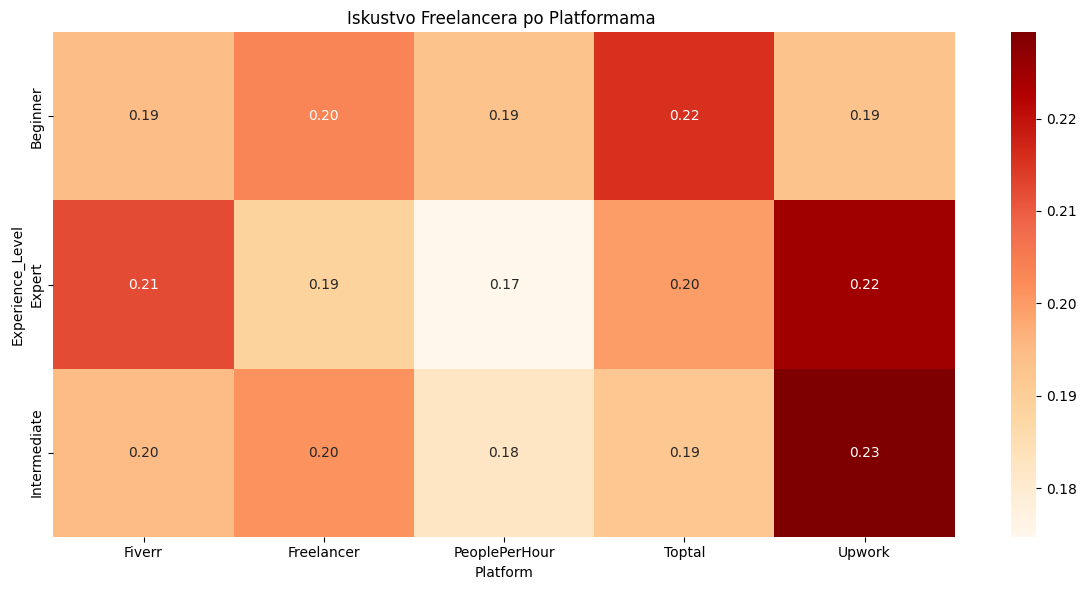

In [223]:
nacrtaj_heatmap(df,'Platform','Experience_Level','Iskustvo Freelancera po Platformama ','Platform','Experience_Level')

**Zaključak posmatranja:** <br>
Razlika postotka između najniže i najviše moguće vjerovatnoće je 5%, ovo je potencijalno još jedna naznaka stratificirano izabranih podataka po iskustvo sa platformi. <br>
U poređenju sa ostalim platformama, početnici su poprilično jednako raspoređeni, dok se u poređenju sa postotkom freelancera na platformi, na Upworku se trenutno čini najmanji postotak početnika

Iz navedenih razloga je ovo zanemarljivo.


### **Figura ?:** Usporedba raspodjela relevatnih podataka za početnike po platformama

Earnings_USD                   Hourly_Rate                \
                    median     mean      std      median   mean    std   
Platform                                                                 
Fiverr              4741.0  4857.44  2799.06       54.61  54.61  28.61   
Freelancer          4046.5  4785.43  3117.03       48.42  48.86  27.12   
PeoplePerHour       4964.0  4931.46  3111.59       53.85  52.56  27.79   
Toptal              5126.5  4872.29  2950.98       45.58  48.90  27.33   
Upwork              5402.0  5232.43  2961.58       52.09  50.20  26.82   

              Job_Success_Rate               Rehire_Rate                
                        median   mean    std      median   mean    std  
Platform                                                                
Fiverr                   75.12  74.80  15.06       40.83  42.29  20.33  
Freelancer               75.96  74.87  13.92       44.11  45.17  20.11  
PeoplePerHour            76.97  76.15  14.40       40.64  43.17  22.29  
Toptal                   76.15  76.14  14.75       45.32  46.36  19.79  
Upwork                   76.26  74.39  14.89       43.50  43.66  21.55

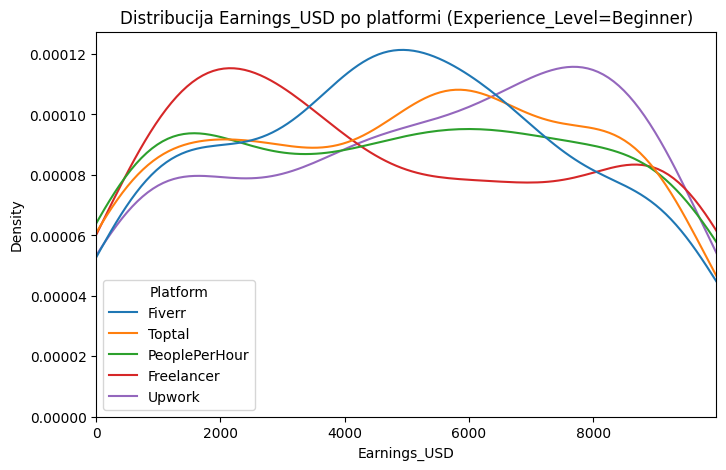

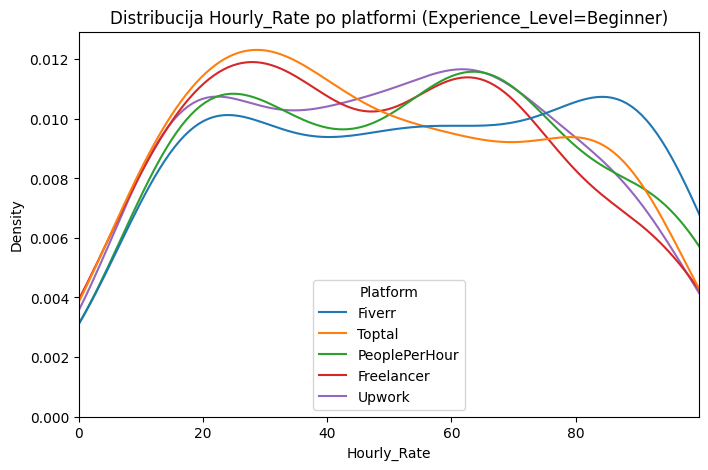

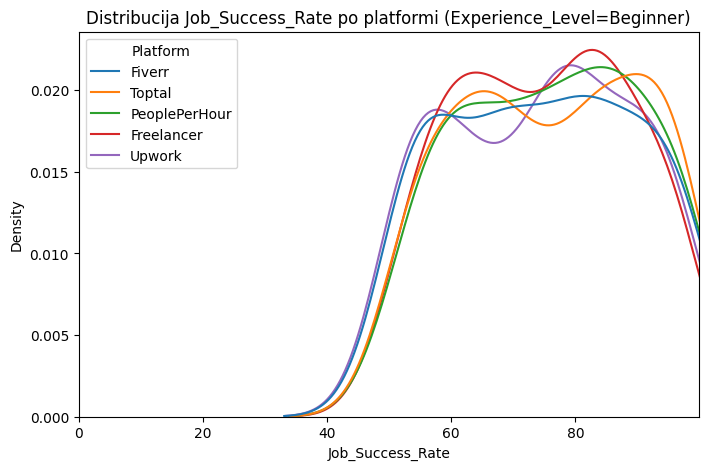

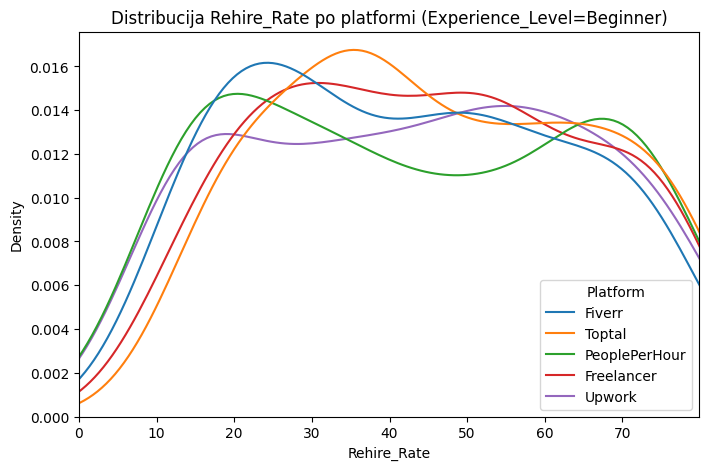

In [224]:
metrics = ['Earnings_USD', 'Hourly_Rate', 'Job_Success_Rate', 'Rehire_Rate'] # Relevantne metrike za posmatranje
beginners = df[df['Experience_Level'] == 'Beginner'] # Posmatramo samo početnike
# Upwork subset

beginner_summary = beginners.groupby('Platform')[[
    'Earnings_USD', 'Hourly_Rate', 'Job_Success_Rate', 'Rehire_Rate'
]].agg(['median', 'mean', 'std']).round(2)

display(beginner_summary)
# Iteracija preko metrika
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=beginners, x=metric, hue='Platform', common_norm=False)
    plt.title("Distribucija " f"{metric} po platformi (Experience_Level=Beginner)")
    plt.xlim(0,beginners[metric].max())
    plt.show()

**Zaključak posmatranja:** <br>
Upwork definitivno pokazuje najkonstantije i najpovoljnije distribucije posmatranih parametara za početnike. <br>
U usporedbi sa ostalim platformama, graf gustine prihoda je poprilično centriran sa najgušćim vrhom, koji je iznad prosjeka. Ovo implicira da većina početnika zarađuje oko medijane zarade, sa znatno većim brojem koji zarađuju iznad prosjeka.<br>
Analogno vrijedi i za graf gustine satnice i stope ponovnog zapošljavanja, dok sa grafom stope uspješnosti usluge, prepoznajemo trend da najviša gustoća ostalih platformi (iako centrirani oko medijana) imaju najgušći vrh ispod prosjeka, dok za Upwork je većinom iznad.

Iz ovoga prepoznajemo povod za preporuku Upworka za početnike.
<hr>

### **Figura ?:** Korelacija relevantnih parametara za početnike po platformama

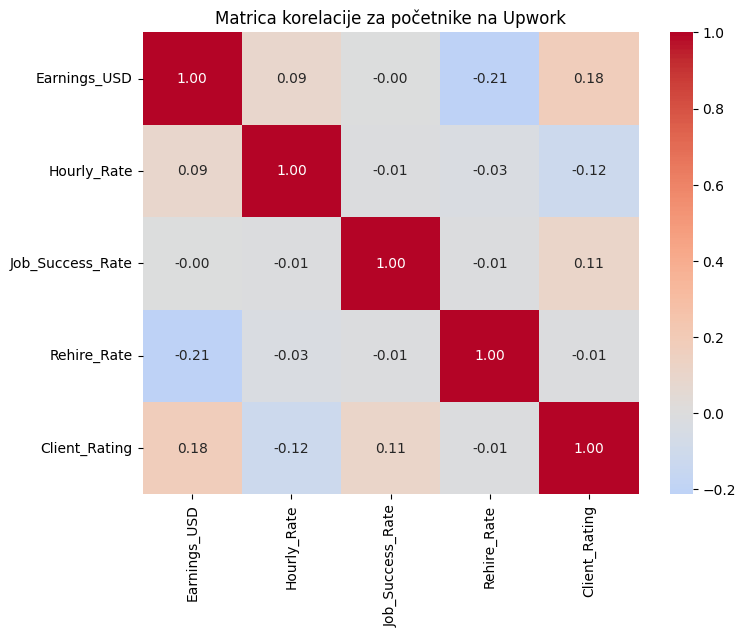

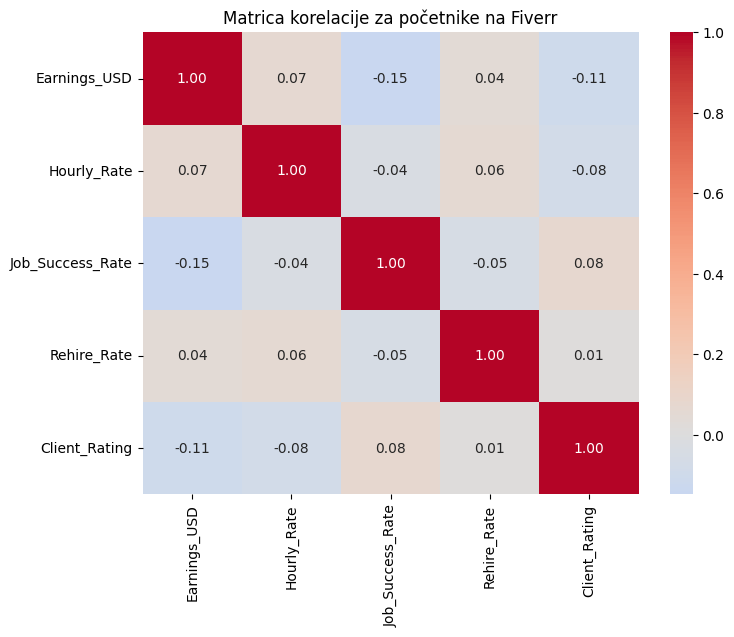

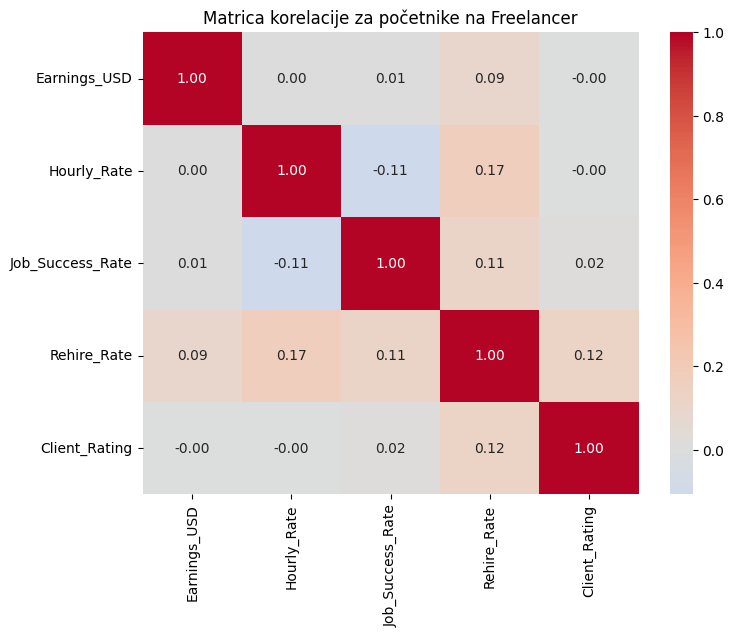

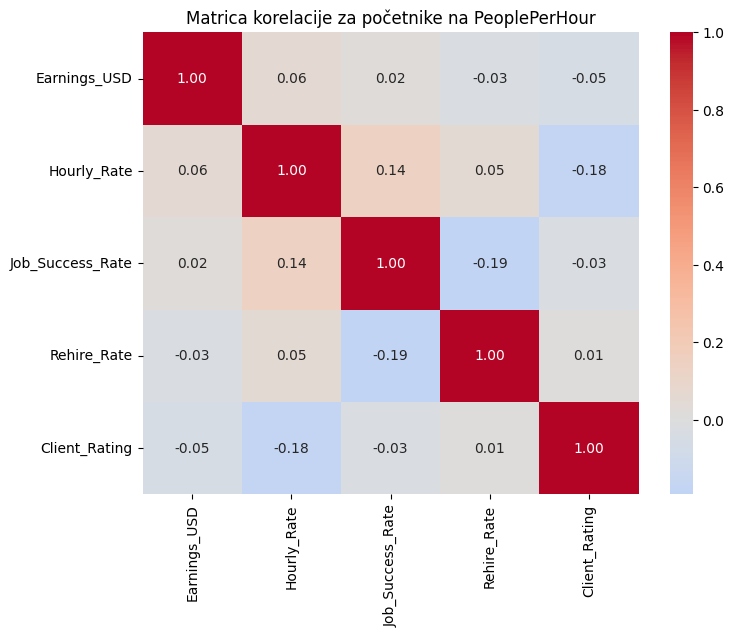

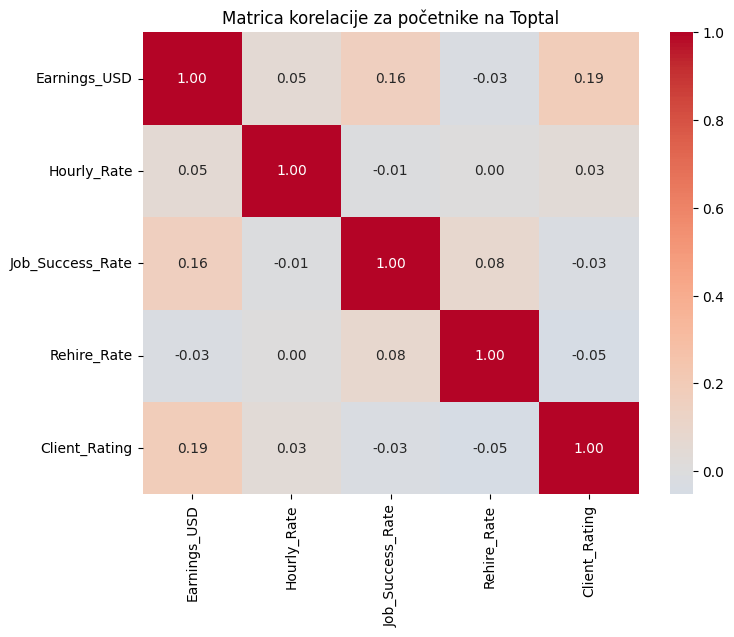

In [225]:
beginners = df[df['Experience_Level'] == 'Beginner']
# Sužavamo samo na početnike

platform_map = {'Upwork': 1, 'Fiverr': 2, 'Freelancer': 3, 'PeoplePerHour':4,'Toptal':5}   ## Indeksiramo platforme

beginners = df[df['Experience_Level'] == 'Beginner'].copy()
beginners['Platform_Index'] = beginners['Platform'].map(platform_map) ## Bez kopije, dobijamo SettingWithCopyWarning

rho, p = spearmanr(beginners['Platform_Index'], beginners['Job_Success_Rate']) ## Spearman korelacija

numerical_cols = [
    'Earnings_USD', 'Hourly_Rate', 'Job_Success_Rate',
    'Rehire_Rate', 'Client_Rating'
]
# Generate correlation heatmap per platform
for platform in sorted(beginners['Platform_Index'].unique()):
    data = beginners[beginners['Platform_Index'] == platform][numerical_cols]
    corr = data.corr(method='spearman')

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
    plt.title(f"Matrica korelacije za početnike na {[k for k, v in platform_map.items() if v == platform][0]}")
     # Lambda fja za prikaz je nužna zbog indeksiranja, mada i bez indeksiranja smo dobijali iste rezultate
    plt.show()



**Zaključak posmatranja:** <br>
Ovi grafovi **nam uistinu jako malo govore,** obzirom da i gdje ima neke korelacije, ona ne prevazilazi 0.25.<br>
Međutim, možemo reći da sugerišu pozitivan odnos ocjene klijenata i prihoda početnika na Upworku, **dakle visoko cijenjeni početnici imaju češto veće prihode,** dok na Toptalu je ovo prisutno **i sa uspješnosti usluge,** gdje dakle uspješniji i visoko cijenjeni imaju veće prihode.



Ostale platforme prikazuju značajno nepoželjne veze.<br>
Na Freelanceru, **korelacija stope ponovnog zaposlenja kod istih klijenata potencira stabiliniji prihod i višu satnicu za uspješnije freelancere.** Međutim, ovo ostavlja **manje prostora za priliku freelancerima koji već nemaju stalne klijente.** Na Upworku je ova stopa **suprotna**, dakle freelanceri koji posluju sa više klijenata, **češto više zarađuju.**

Mada, ovo je više posmatramo relativno. Za objektivne, generalne zaključke su potrebne konkretnije veze.

**<i>Napomena:** I Pearson korelacija daje isti zaključak.
<hr>

**Zaključak potkrepe:** <br>
Koristeći metode zajedničke distribucije i zavisnosti se sigurno **može doći do zaključka da Upwork je preporučuljiva platforma za početnike**.<br> Međutim zbog ograničenosti dataset-a, **ovaj zaključak ne može biti konkretan kao putem prethodnih metoda.**
<hr>

### **POTKREPA 2:** Iskusniji freelancer-i gravitiraju ka platformi Toptal dok oni manje iskusni preferiraju Fiverr

Ova hipoteza je analizirana uvjetnim vjerovatnoćama, te ćemo ovdje pokušati potkrijepiti je upotrebom zajedničke distribucije i Spearmannove korelacije.

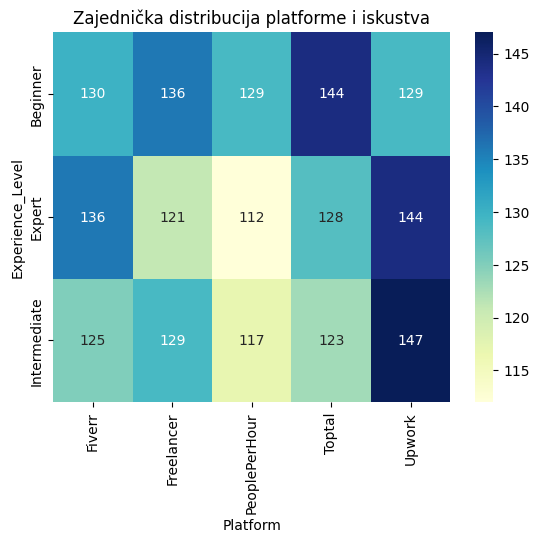

In [226]:
platform_experience = pd.crosstab(df['Experience_Level'], sorted(df['Platform']), normalize='index')
sns.heatmap(pd.crosstab(df['Experience_Level'], df['Platform']), annot=True, cmap='YlGnBu', fmt="d") ## Za colormape koristio sam preporuke ChatGPT i Deepseek.
plt.title('Zajednička distribucija platforme i iskustva')
plt.xlabel('Platform')
plt.show()



**Zaključak posmatranja:** <br>
Ovaj graf smo već prethodno vidjeli, ali predstavljen kroz procente.
 Ponovo vidimo poprilično jednaku raspodjelu. Međutim, u svrhu hipoteze, primjetimo da početnici su češći na Fiverr i Upwork, dok eksperti su češći na Fiverru i Toptalu.


In [227]:

rho, p = spearmanr(df['Experience_Index'], df['Platform_Index'])


corr_tabela = pd.DataFrame({
    'Parametar': ['Spearman korelacija', 'P-vrijednost'],
    'Vrijednost': [rho, p]
})
corr_table.style.set_caption("Spearman Korelacija Platforme i Iskustva")
html = f"""
<div style="display:flex;flex-direction:column;justify-content:center;width:50%">
{corr_tabela.to_html(index=False)}
</div>
"""

display(HTML(html))

Parametar,Vrijednost
Spearman korelacija,-0.020348
P-vrijednost,0.369163


**Zaključak posmatranja:**

Podsjećamo, platforme su indeksirane tako da je Toptal najviši indeks, a Fiverr najniži, te iskustvo tako da je Beginner najniži, a Expert najviši.

Skladno sa tim, negativna korelacija nalaže da **eksperti (viši indeksi) gravitiraju ka Fiverru (nižem indeksu).**

Međutim, niska korelacija i visoka P-vrijednost, kao prethodno, daju mnogo prostora za sumnju i ponovo ništa konkretno ne govore.

Pokušati ćemo uvesti novu podhipotezu u cilju konkretnijeg odgovora.
<hr>

### **HIPOTEZA:** Početnici u razvoju web stranica i aplikacija gravitiraju Fiverru, dok iskusniji freelanceri u tom polju gravitiraju TopTalu

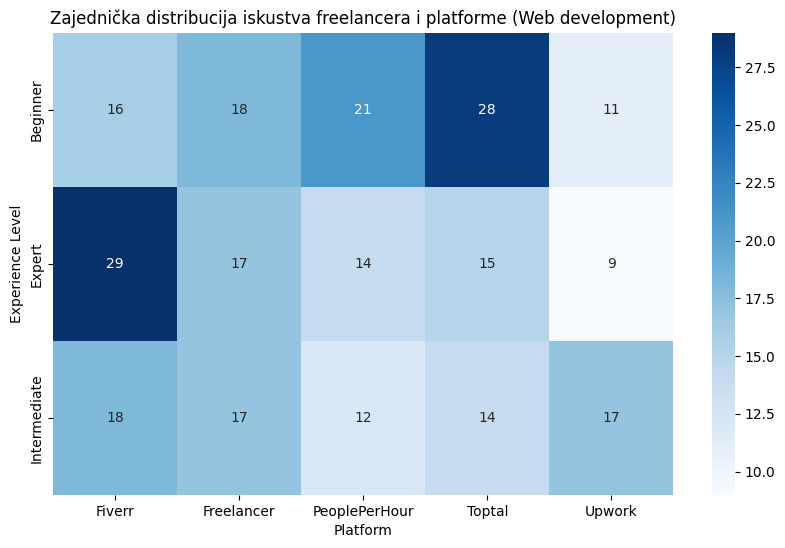

In [228]:
# Filter for Design and Software Development categories
web_freelanceri = df[df['Job_Category'] == 'Web Development'].copy()

web_freelanceri['Experience_Index'] = web_freelanceri['Experience_Level'].map(exp_map)
web_freelanceri['Platform_Index'] = web_freelanceri['Platform'].map(platform_map)

plt.figure(figsize=(10, 6))
web_joint_distrub = pd.crosstab(web_freelanceri['Experience_Level'], web_freelanceri['Platform'])
sns.heatmap(web_joint_distrub, annot=True, cmap="Blues", cbar=True)

# Customize plot
plt.title('Zajednička distribucija iskustva freelancera i platforme (Web development)')
plt.xlabel('Platform')
plt.ylabel('Experience Level')
plt.show()

In [229]:
rho_design, p_value_design = spearmanr(web_freelanceri['Experience_Level'], web_freelanceri['Platform'])

spearman_corr_tabela = pd.DataFrame({
    'Parametar': ['Spearman korelacija', 'P-vrijednost'],
    'Vrijednost': [rho_design, p_value_design]
})

pearson_corr_df = df[df['Job_Category'] == 'Web Development'][['Experience_Index', 'Platform_Index']].corr()

html = f"""
<div style="display:flex;flex-direction:column;justify-content:center;width:50%">
<h4>Tabela Spearman korelacije:</h4>
{spearman_corr_tabela.to_html(index=False)}
<h4>Tabela Pearson korelacije:</h4>
{pearson_corr_df.to_html(index=False)}
</div>
"""
display(HTML(html))


Parametar,Vrijednost
Spearman korelacija,-0.035116
P-vrijednost,0.575967
Experience_Index,Platform_Index
1.000000,-0.183115
-0.183115,1.000000


**Zaključak posmatranja:**

Ovdje bi se činilo da smo uspjeli opovrgnuti hipotezu, međutim postoje povodi za sumnju:

 1. Prostor uzorka je **VRLO UZAK** - 256 ukupno uzoraka, u prosjeku samo 17 freelancera po kategoriji.
 2. Opet prisutna "dobitna" kombinacija niske negativne Spermann korelacije i visoke P-vrijednosti (Pearson korelacija daje malo jaču negativnu korelaciju, ali objektivno je i ona slaba)

 Ova hipoteza je izvedena kao primjer, kako je ovo prisutno za gotovo svaku uslugu.


### **Zaključno, ovom hipotezom, putem mjera zajedničke distribucije i zavisnosti se ne može ustanoviti veza između iskustva i platformi.**

 <hr>

### **HIPOTEZA ?:** Freelanceri koji izvršavaju uspješnije usluge, imaju više prihode.

Ovu hipotezu ćemo pokušati potvrditi utvrđivanjem pozitivne korelacije između *Job_Success_Rate* i *Earnings_USD.*

Prvo, poredimo grafove distribucija za stopu uspješnosti i prihode, tako što ćemo prvo normirati *(prikazati na intervalu [0,1])*, za lakše posmatranje.

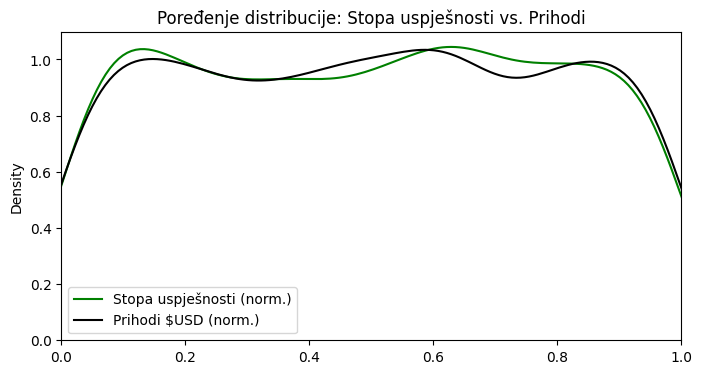

In [230]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized = scaler.fit_transform(df[['Job_Success_Rate', 'Earnings_USD']])

df_normalized = pd.DataFrame(normalized, columns=['Job_Success_Rate_norm', 'Earnings_USD_norm'])

plt.figure(figsize=(8, 4))
sns.kdeplot(df_normalized['Job_Success_Rate_norm'], label='Stopa uspješnosti (norm.)', color='green')
sns.kdeplot(df_normalized['Earnings_USD_norm'], label='Prihodi $USD (norm.)', color='black')
plt.title('Poređenje distribucije: Stopa uspješnosti vs. Prihodi')
plt.xlabel('')
plt.legend()
plt.xlim(0,1) ## Iz nekog razloga, jako voli da prikazuje negativne vrijednosti za nenegativne parametre, i preko 120%
plt.show()

Na prvu, vidimo i statistički povod za ispitvanje ove hipoteze.
Predstavimo sada globalnu Pearson korelaciju ova dva parametra.

In [231]:
df[['Job_Success_Rate', 'Earnings_USD']].corr(method='pearson') ## Gubim vjeru u ljude i korelaciju

,Job_Success_Rate,Earnings_USD
Job_Success_Rate,1.000000,0.029551
Earnings_USD,0.029551,1.000000


**Zaključak posmatranja:** Globalna korelacija je pozitivna, ali nedovoljno jaka da bi sa sigurnošću potvrdila hipotezu. Posmatrajmo dalje po suženijim populacijama.
<hr>

In [232]:
correlation_by_region = []
correlation_by_job = []


for region in df['Region'].unique():
    subset = df[df['Region'] == region]

    corr = subset[['Job_Success_Rate', 'Earnings_USD']].corr(method='pearson') ## Tabela Pearson korelacije za subset
    correlation = corr.loc['Job_Success_Rate', 'Earnings_USD'] ## Samo vrijednost jedne korelacije koja nam je potrebna
    correlation_by_region.append({'Regija': region, 'Korelacija za regiju': correlation})

region_corr_df = pd.DataFrame(correlation_by_region)
region_corr_df = region_corr_df.sort_values(by='Korelacija za regiju', ascending=False) ## Sortirano od najjače pozitivne ka najjačoj negativnoj

for job in df['Job_Category'].unique():
    subset = df[df['Job_Category'] == job]

    corr = subset[['Job_Success_Rate', 'Earnings_USD']].corr(method='pearson')
    correlation = corr.loc['Job_Success_Rate', 'Earnings_USD']
    correlation_by_job.append({'Usluga': job, 'Korelacija za uslugu': correlation})

job_corr_df = pd.DataFrame(correlation_by_job)
job_corr_df = job_corr_df.sort_values(by='Korelacija za uslugu', ascending=False) ## Sortirano od najjače pozitivne ka najjačoj negativnoj

html = f"""
<center><h4>Tabela Pearson korelacija stope uspješnoti i prihoda po regiji i usluzi:</h4></center>
<div style="display:flex;flex-direction:row;justify-content:center;">

{region_corr_df.to_html(index=False)}
{job_corr_df.to_html(index=False)}
</div>
"""
display(HTML(html))

Regija,Korelacija za regiju
Asia,0.159740
Australia,0.032149
Canada,0.025876
Middle East,0.025224
Europe,0.016784
UK,-0.006012
USA,-0.042221
Usluga,Korelacija za uslugu
Graphic Design,0.083449
SEO,0.066803


**Zaključak posmatranja:**

Obzirom na **široku raspodjelu korelacija** (pozitivnih i negativnih, pri tom slabih), **ne možemo utvrditi vezu između prihoda freelancera i stope uspješnosti usluge.**

Dakle, hipoteza nam u ovom slučaju, **je opovrgnuta. Ne postoji konkretna jaka pozitivna korelacija između stope uspješnosti i prihoda.**
<hr>

### **HIPOTEZA ?:** Veća ulaganja u marketing doprinosi višim prihodima.

Analogno, ovu hipotezu ćemo pokušati potvrditi utvrđivanjem pozitivne korelacije između *Marketing_Spend* i *Earnings_USD*. Također, normirati ćemo ovdje za jasniju sliku.

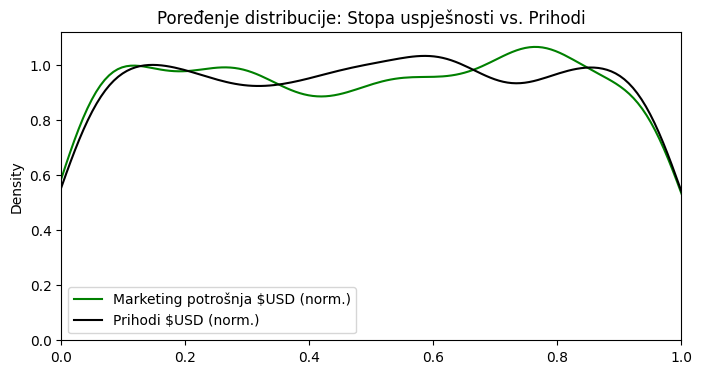

In [233]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized = scaler.fit_transform(df[['Earnings_USD', 'Marketing_Spend']])

df_normalized = pd.DataFrame(normalized, columns=['Earnings_USD_norm','Marketing_Spend_norm'])

plt.figure(figsize=(8, 4))
sns.kdeplot(df_normalized['Marketing_Spend_norm'], label='Marketing potrošnja $USD (norm.)', color='green')
sns.kdeplot(df_normalized['Earnings_USD_norm'], label='Prihodi $USD (norm.)', color='black')
plt.title('Poređenje distribucije: Stopa uspješnosti vs. Prihodi')
plt.xlabel('')
plt.legend()
plt.xlim(0,1)
plt.show()

Ovdje već nije tako jasna relacija ove dvije vrijednosti.

Nastavljamo dalje.

In [234]:
df[['Marketing_Spend', 'Earnings_USD']].corr(method='pearson') ## Gubim vjeru u ljude i korelaciju

,Marketing_Spend,Earnings_USD
Marketing_Spend,1.000000,0.043041
Earnings_USD,0.043041,1.000000


**Zaključak posmatranja:**

Ovdje, **korelacija je ubjedljivija od prethodne.**
Međutim, opet pričamo o koeficijentima 0.02 naspram 0.04...

No, ovdje ima zapravo mnogo smisla suziti populaciju, i da ispitamo ponašanje u različitim regijama.
**Ako globalno, zaradi ne doprinosi ulaganje u marketing, da li je to tačno za svaku regiju?**

In [235]:
correlation_by_region = []
correlation_by_job = []


for region in df['Region'].unique():
    subset = df[df['Region'] == region]

    corr = subset[['Marketing_Spend', 'Earnings_USD']].corr(method='pearson') ## Tabela Pearson korelacije za subset
    correlation = corr.loc['Marketing_Spend', 'Earnings_USD'] ## Samo vrijednost jedne korelacije koja nam je potrebna
    correlation_by_region.append({'Regija': region, 'Korelacija za regiju': correlation})

region_corr_df = pd.DataFrame(correlation_by_region)
region_corr_df = region_corr_df.sort_values(by='Korelacija za regiju', ascending=False) ## Sortirano od najjače pozitivne ka najjačoj negativnoj

for job in df['Job_Category'].unique():
    subset = df[df['Job_Category'] == job]

    corr = subset[['Marketing_Spend', 'Earnings_USD']].corr(method='pearson')
    correlation = corr.loc['Marketing_Spend', 'Earnings_USD']
    correlation_by_job.append({'Usluga': job, 'Korelacija za uslugu': correlation})

job_corr_df = pd.DataFrame(correlation_by_job)
job_corr_df = job_corr_df.sort_values(by='Korelacija za uslugu', ascending=False) ## Sortirano od najjače pozitivne ka najjačoj negativnoj

html = f"""
<center><h4>Tabela Pearson korelacija stope uspješnoti i prihoda po regiji i usluzi:</h4></center>
<div style="display:flex;flex-direction:row;justify-content:center;">

{region_corr_df.to_html(index=False)}
{job_corr_df.to_html(index=False)}
</div>
"""
display(HTML(html))

Regija,Korelacija za regiju
USA,0.128768
Asia,0.104287
UK,0.038478
Canada,0.023488
Australia,0.009494
Middle East,0.000754
Europe,-0.001871
Usluga,Korelacija za uslugu
App Development,0.117284
Content Writing,0.074958


**Zaključak posmatranja:**
Na većim tržištima, SAD i Azije, **ulaganje u marketing je u nekoj mjeri doprinosilo zaradi,** dok zanimljivo, u Evropi se pokazalo da to nikako nije slučaj, te da čak je doprinosilo **nižoj zaradi**.

Naravno, objektivno gledano, ovo je kao izvlačenje jajeta iz dlake. Iako postoje tržišta gdje je primjećena korelacija između ulaganja u marketing i prihoda, iz poslovne perspektive smatramo da je sigurno potrebno i u tim slučajevima ponovno posmatrati isplatljivost takvih usluga.

### Prilog: Ilustrativni razlog neupotrebe scatter-plota kao (ne)vizualizaciju

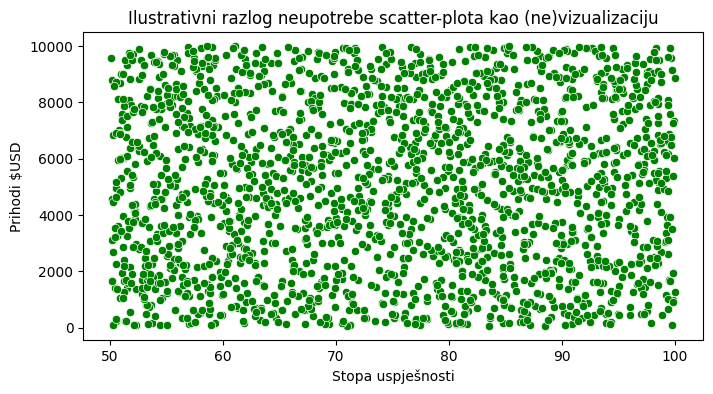

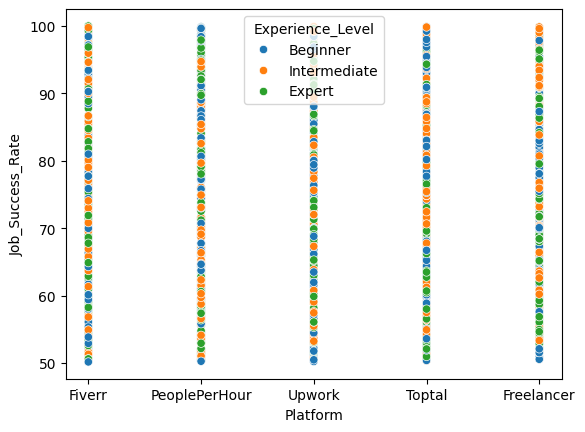

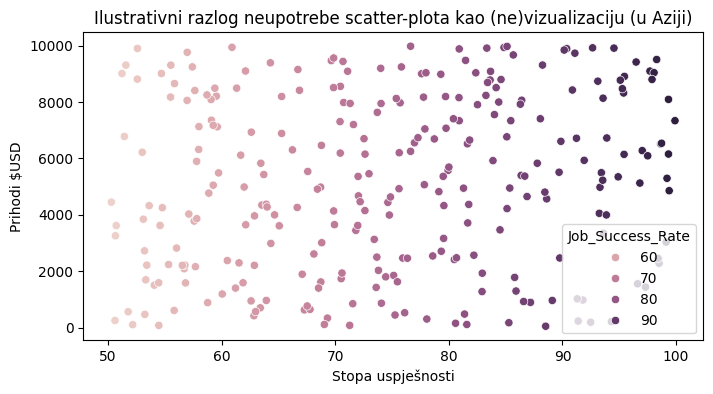

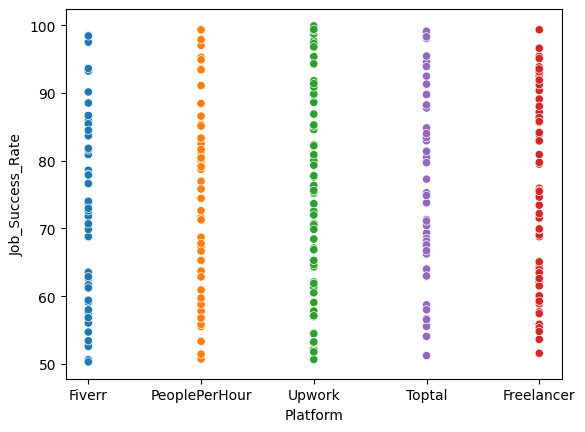

In [236]:
# Pokušaj najjednostavnijeg prikazivanja stope uspješnosti i prihoda, na nivou cijelog dataseta, nikakva ograničenje niti promjene primjenute.
plt.figure(figsize=(8, 4))

sns.scatterplot(x=df['Job_Success_Rate'],
                y=df['Earnings_USD'],
                color='green')

plt.title('Ilustrativni razlog neupotrebe scatter-plota kao (ne)vizualizaciju')
plt.xlabel('Stopa uspješnosti')
plt.ylabel('Prihodi $USD')


plt.show()
sns.scatterplot(x=df['Platform'],
                y=df['Job_Success_Rate'],
                hue=df['Experience_Level'],
                palette='tab10')
plt.show()

# Primjer pokušaja suženja prikazivanja stope uspješnosti i prihoda, po regiji.
plt.figure(figsize=(8, 4))
regija=df[df['Region']=="Asia"]
sns.scatterplot(x=df['Job_Success_Rate'],
                y=df['Earnings_USD'],
                hue=regija['Job_Success_Rate'],
                color='green')

plt.title('Ilustrativni razlog neupotrebe scatter-plota kao (ne)vizualizaciju (u Aziji)')
plt.xlabel('Stopa uspješnosti')
plt.ylabel('Prihodi $USD')


plt.show()

sns.scatterplot(x=df['Platform'],
                y=df['Job_Success_Rate'],
                hue=regija['Platform'],
                palette='tab10',legend=False)
plt.show()

##### experimental

In [237]:
##from google.colab import sheets
## sheet = sheets.InteractiveSheet(df=description_categorical_data)
## ovaj faktor iznenađenja ostavljam za kasnije

In [238]:
# Vaš kod ovdje
